In [896]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [897]:
import statsmodels as sm
from scipy.stats import normaltest
from warnings import simplefilter
from sklearn.preprocessing import MaxAbsScaler,LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
import os
from mplsoccer import Pitch, VerticalPitch, PyPizza, add_image, FontManager
from PIL import Image
import bar_chart_race as bcr

In [898]:
laliga_df = pd.read_csv('E:\\storage\\Download\\LaLiga\\laliga_player.csv')
laliga_df.head()


,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,-9999
0,1,Luis Abram,pe PER,DF,Granada,25.0,1996.0,8,6,560,...,0.5,0.0,0.5,0.08,0.00,0.08,0.08,0.08,Matches,1f462f95
1,2,Marcos Acuña,ar ARG,DF,Sevilla,29.0,1991.0,31,26,2260,...,1.4,3.0,4.4,0.06,0.12,0.18,0.06,0.18,Matches,81442ecb
2,3,Martin Agirregabiria,es ESP,DF,Alavés,25.0,1996.0,24,17,1616,...,0.2,1.0,1.2,0.01,0.05,0.07,0.01,0.07,Matches,355c883a
3,4,Julen Agirrezabala,es ESP,GK,Athletic Club,20.0,2000.0,4,4,360,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,a2c1a8d3
4,5,Sergio Agüero,ar ARG,FW,Barcelona,33.0,1988.0,4,2,151,...,1.1,0.3,1.3,0.64,0.16,0.80,0.64,0.80,Matches,4d034881


In [899]:
age_df = pd.read_csv('E:\\storage\\Download\\EPL\\Age.csv')
age_df.head()

,Squad1,Age1,Age2
0,1,27.0,27.7
1,2,27.7,26.2
2,3,27.4,28.1
3,4,26.5,28.6
4,5,24.4,28.9


In [900]:
epl_df = pd.read_csv('E:\\storage\\Download\\EPL\\EPL_Player.csv')
epl_df.head()

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


In [901]:
epl_df1 = pd.read_csv('E:\\storage\\Download\\EPL\\Squad standard Data.csv')
epl_df1.head()


,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Pts
0,Manchester City,26,27.0,68.5,38,418,3420,38,96,63,...,88.5,81.4,59.6,140.9,2.33,1.57,3.89,2.14,3.71,93
1,Liverpool,27,27.7,63.3,38,418,3420,38,94,71,...,89.2,83.4,59.8,143.2,2.35,1.57,3.92,2.19,3.77,92
2,Chelsea,26,27.4,62.3,38,418,3420,38,75,52,...,67.2,60.7,46.9,107.6,1.77,1.23,3.00,1.60,2.83,74
3,Tottenham,25,26.5,52.0,38,418,3420,38,63,50,...,65.0,61.3,49.2,110.4,1.71,1.29,3.01,1.61,2.91,71
4,Arsenal,27,24.4,53.2,38,418,3420,38,60,41,...,59.8,53.9,36.8,90.7,1.57,0.97,2.54,1.42,2.39,69


In [902]:
epl_df2 = pd.read_csv('E:\\storage\\Download\\EPL\\Squad Shooting.csv')
epl_df2.head()

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Pts
0,Norwich City,28.0,38.0,21.0,374.0,104.0,27.8,9.84,2.74,0.05,...,18.1,18.0,3.0,3.0,33.1,30.8,0.08,-12.1,-12.8,22.0
1,Watford,30.0,38.0,33.0,398.0,126.0,31.7,10.47,3.32,0.08,...,17.6,23.0,1.0,2.0,38.7,37.2,0.09,-5.7,-5.2,23.0
2,Burnley,23.0,38.0,32.0,406.0,117.0,28.8,10.68,3.08,0.08,...,16.4,14.0,1.0,2.0,39.0,37.4,0.09,-7.0,-6.4,35.0
3,Leeds United,29.0,38.0,42.0,485.0,142.0,29.3,12.76,3.74,0.08,...,17.7,13.0,5.0,5.0,47.1,43.3,0.09,-5.1,-6.3,38.0
4,Everton,33.0,38.0,42.0,431.0,127.0,29.5,11.34,3.34,0.08,...,17.1,18.0,6.0,7.0,42.7,37.5,0.09,-0.7,-1.5,39.0


In [903]:
epl_df3 = pd.read_csv('E:\\storage\\Download\\EPL\\Squad possession.csv')
epl_df3.head()

,Squad,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,...,Prog,01-Mar,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Pts
0,Manchester City,26,68.5,38,31078,2033,6918,16023,10304,1669,...,3212,831,379,370,442,26306,24032,91.4,1766,93
1,Liverpool,27,63.3,38,29319,2289,7506,14565,8934,1522,...,2350,691,252,482,446,24043,20856,86.7,1967,92
2,Chelsea,26,62.3,38,28776,2413,8262,14029,8298,1188,...,2275,694,247,437,477,23482,20878,88.9,1614,74
3,Tottenham,25,52.0,38,24704,2680,8323,11942,5982,960,...,1895,553,192,432,461,19325,16914,87.5,1319,71
4,Arsenal,27,53.2,38,23735,2447,7398,11003,6845,1093,...,1865,546,205,471,393,18422,16110,87.4,1168,69


In [904]:
epl_df4 = pd.read_csv('E:\\storage\\Download\\EPL\\Squad Passing.csv')
epl_df4.head()

,Squad,# Pl,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,...,Cmp3%,Ast,xA,A-xA,KP,01-Mar,PPA,CrsPA,Prog,Pts
0,Manchester City,26,38,24032,27274,88.1,456456,119264,10056,10836,...,74.2,63,59.6,3.4,525,1945,562,78,1766,93
1,Liverpool,27,38,20856,24964,83.5,412739,130477,7998,8930,...,68.5,71,59.8,11.2,507,1824,528,93,1967,92
2,Chelsea,26,38,20878,24294,85.9,382347,114543,9010,9831,...,66.6,52,46.9,5.1,430,1561,446,69,1614,74
3,Tottenham,25,38,16914,20207,83.7,321807,96654,6991,7726,...,64.8,50,49.2,0.8,379,1185,358,77,1319,71
4,Arsenal,27,38,16110,19512,82.6,300732,87839,6886,7676,...,58.6,41,36.8,4.2,425,1161,348,77,1168,69


In [905]:
epl_df5 = pd.read_csv('E:\\storage\\Download\\EPL\\Squad Pass Types.csv')
epl_df5.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Pass Types,Pass Types.1,Pass Types.2,Pass Types.3,Pass Types.4,Pass Types.5,...,Body Parts,Body Parts.1,Body Parts.2,Body Parts.3,Body Parts.4,Outcomes,Outcomes.1,Outcomes.2,Outcomes.3,Outcomes.4
0,Squad,# Pl,90s,Att,Live,Dead,FK,TB,Press,Sw,...,Left,Right,Head,TI,Other,Cmp,Off,Out,Int,Blocks
1,Arsenal,27,38,19512,17883,1629,408,28,2446,503,...,8203,9281,705,677,238,16110,58,292,521,370
2,Aston Villa,31,38,16026,14192,1834,527,35,2230,478,...,5279,8685,653,715,226,12521,46,312,472,377
3,Brentford,29,38,15894,14130,1764,434,28,2299,399,...,4869,8282,1018,781,268,11551,57,329,563,445
4,Brighton,26,38,20299,18601,1698,392,24,2802,570,...,4981,13097,678,783,281,16341,49,315,628,522


In [906]:
epl_df6 = pd.read_csv('E:\\storage\\Download\\EPL\\Squad Miscellanous.csv')
epl_df6.head()

,Squad,# Pl,90s,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Pts
0,Manchester City,26,38,42,1,0,373,442,65,610,434,325,7,1,0,3056,530,433,55.0,93
1,Liverpool,27,38,50,1,0,422,395,63,554,552,366,5,0,1,3804,621,549,53.1,92
2,Chelsea,26,38,63,1,0,485,504,69,496,557,401,8,5,1,3152,623,547,53.2,74
3,Tottenham,25,38,69,1,1,478,515,62,408,549,371,3,2,1,2899,652,553,54.1,71
4,Arsenal,27,38,67,4,3,425,436,66,433,476,350,6,6,1,3139,553,662,45.5,69


In [907]:
epl_df7 = pd.read_csv('E:\\storage\\Download\\EPL\\Squad Goal and Shot Creation.csv')
epl_df7.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,SCA,SCA.1,SCA Types,SCA Types.1,SCA Types.2,SCA Types.3,SCA Types.4,SCA Types.5,GCA,GCA.1,GCA Types,GCA Types.1,GCA Types.2,GCA Types.3,GCA Types.4,GCA Types.5
0,Squad,# Pl,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,Def,GCA,GCA90,PassLive,PassDead,Drib,Sh,Fld,Def
1,Arsenal,27,38,921,24.24,689,65,54,53,39,21,88,2.32,60,9,1,10,4,4
2,Aston Villa,31,38,725,19.08,527,73,33,34,46,12,82,2.16,55,8,7,8,4,0
3,Brentford,29,38,640,16.84,435,83,29,41,40,12,74,1.95,45,7,3,8,10,1
4,Brighton,26,38,748,19.68,533,77,46,42,34,16,64,1.68,43,8,3,5,5,0


In [908]:
epl_df8 = pd.read_csv('E:\\storage\\Download\\EPL\\Squad defensive.csv')
epl_df8.head()

,Squad,# Pl,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Pts
0,Manchester City,26,38,508,325,177,225,106,186,478,...,1460,392,67,3,325,434,942,475,7,93
1,Liverpool,27,38,589,366,211,263,115,196,551,...,1702,462,91,5,371,552,1141,566,7,92
2,Chelsea,26,38,660,401,272,283,105,214,536,...,1525,562,114,5,448,557,1217,730,13,74
3,Tottenham,25,38,690,371,316,285,89,233,568,...,1100,613,184,4,429,549,1239,820,4,71
4,Arsenal,27,38,573,350,262,211,100,183,421,...,1464,528,143,0,385,476,1049,641,12,69


In [909]:
epl_df9 = pd.read_csv('E:\\storage\\Download\\EPL\\Points table.csv')
epl_df9.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,5,Arsenal,38,22,3,13,61,48,13,69,1.82,59.8,47.0,12.9,0.34,59665,Bukayo Saka - 11,Aaron Ramsdale
1,14,Aston Villa,38,13,6,19,52,54,-2,45,1.18,44.1,48.9,-4.8,-0.13,41681,Ollie Watkins - 11,Emiliano Martínez
2,13,Brentford,38,13,7,18,48,56,-8,46,1.21,47.7,49.2,-1.5,-0.04,16918,Ivan Toney - 12,David Raya
3,9,Brighton,38,12,15,11,42,44,-2,51,1.34,46.0,45.4,0.5,0.01,30966,Leandro Trossard Neal Maupay - 8,Robert Sánchez
4,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278,Maxwel Cornet - 9,Nick Pope


In [910]:
epl_df10 = pd.read_csv('E:\\storage\\Download\\EPL\\Goalkeeping Data.csv')
epl_df10.head()

,Unnamed: 0,Unnamed: 1,Playing Time,Playing Time.1,Playing Time.2,Playing Time.3,Performance,Performance.1,Performance.2,Performance.3,...,Performance.5,Performance.6,Performance.7,Performance.8,Performance.9,Penalty Kicks,Penalty Kicks.1,Penalty Kicks.2,Penalty Kicks.3,Penalty Kicks.4
0,Squad,# Pl,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,...,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%
1,Arsenal,2,38,38,3420,38,48,1.26,141,93,...,22,3,13,13,34.2,6,5,0,1,0
2,Aston Villa,3,38,38,3420,38,54,1.42,145,96,...,13,6,19,11,28.9,6,4,1,1,20
3,Brentford,3,38,38,3420,38,56,1.47,173,123,...,13,7,18,9,23.7,5,5,0,0,0
4,Brighton,2,38,38,3419,38,44,1.16,145,103,...,12,15,11,11,28.9,4,3,0,1,0


In [911]:
laliga_df1 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Standard1.csv')
laliga_df1.head()

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Pts
0,Real Madrid,31,27.7,60.3,38,418,3420,38,80,59,...,74.4,65.3,51.3,116.6,1.96,1.35,3.31,1.72,3.07,86
1,Barcelona,38,26.2,64.8,38,418,3420,38,68,52,...,62.1,56.8,44.4,101.1,1.63,1.17,2.80,1.49,2.66,73
2,Atlético Madrid,26,28.1,50.6,38,418,3420,38,63,45,...,52.8,49.0,38.0,87.0,1.39,1.00,2.39,1.29,2.29,71
3,Sevilla,33,28.6,59.8,38,418,3420,38,51,40,...,43.5,41.2,32.9,74.1,1.15,0.87,2.01,1.08,1.95,70
4,Betis,31,28.9,54.1,38,418,3420,38,61,45,...,55.2,50.7,37.9,88.6,1.45,1.00,2.45,1.33,2.33,65


In [912]:
laliga_df2 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad shooting1.csv')
laliga_df2.head()

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,...,G-xG,np:G-xG,Pts,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Alavés,33,38,29,380,110,28.9,10.00,2.89,0.06,...,-7.9,-8.7,31,NaN,NaN,NaN,NaN,NaN,NaN,31.70
1,Levante,31,38,51,431,144,33.4,11.34,3.79,0.10,...,-5.5,-3.9,35,NaN,NaN,NaN,NaN,NaN,NaN,30.27
2,Granada,32,38,43,425,131,30.8,11.18,3.45,0.09,...,1.7,2.5,38,NaN,NaN,NaN,NaN,NaN,NaN,33.13
3,Cádiz,33,38,35,409,120,29.3,10.76,3.16,0.08,...,-6.4,-4.8,39,NaN,NaN,NaN,NaN,NaN,NaN,34.32
4,Getafe,31,38,32,404,111,27.5,10.63,2.92,0.07,...,2.5,3.3,39,NaN,NaN,NaN,NaN,NaN,NaN,29.98


In [913]:
laliga_df3 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Possession1.csv')
laliga_df3.head()

,Squad,# Pl,Poss,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,...,Prog,01-Mar,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Pts
0,Real Madrid,31,60.3,38,28633,2736,8566,13082,8937,1338,...,2421,760,314,391,359,23676,21520,90.9,1569,86
1,Barcelona,38,64.8,38,29116,2490,7812,14983,8206,1210,...,2459,631,267,526,444,23983,21651,90.3,1669,73
2,Atlético Madrid,26,50.6,38,23293,2175,7313,11175,6148,977,...,1643,475,147,465,383,17923,15299,85.4,1250,71
3,Sevilla,33,59.8,38,26188,2960,9167,12291,6169,845,...,1578,473,136,527,406,20853,18459,88.5,1180,70
4,Betis,31,54.1,38,23865,2539,7663,11496,6083,953,...,1607,459,175,467,407,18137,15791,87.1,1242,65


In [914]:
laliga_df4 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Passing1.csv')
# laliga_df4.head()

In [915]:
laliga_df5 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Pass Types1.csv')
# laliga_df5.head()

In [916]:
laliga_df6 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Miscellanous1.csv')
# laliga_df6.head()

In [917]:
laliga_df7 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Goalkeeping1.csv')
# laliga_df7.head()

In [918]:
laliga_df8 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Goal and Shot Creation1.csv')
# laliga_df8.head()

In [919]:
laliga_df9 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Defensive1.csv')
# laliga_df9.head()

In [920]:
laliga_df10 = pd.read_csv('E:\\storage\\Download\\LaLiga\\Squad Data1.csv')
# laliga_df10.head()

Text(0.5, 1.0, 'Plot of Clubs vs Total goals')

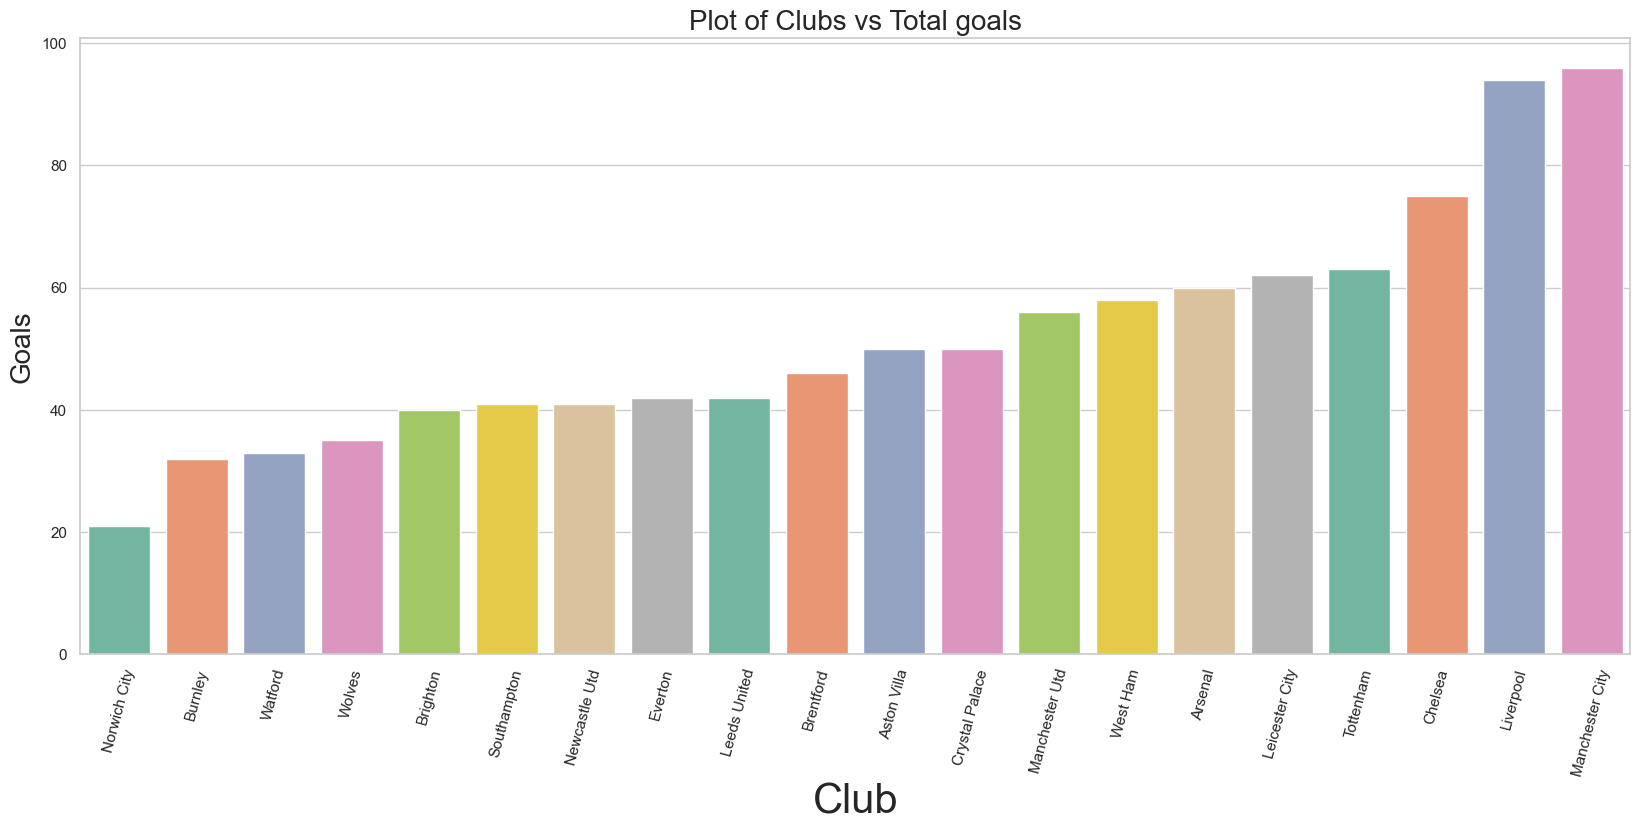

In [921]:
goals_by_clubs = pd.DataFrame(epl_df1.groupby('Squad', as_index = False)['Gls'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Gls', data = goals_by_clubs.sort_values(by = "Gls"), palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Goals", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total goals', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Assists')

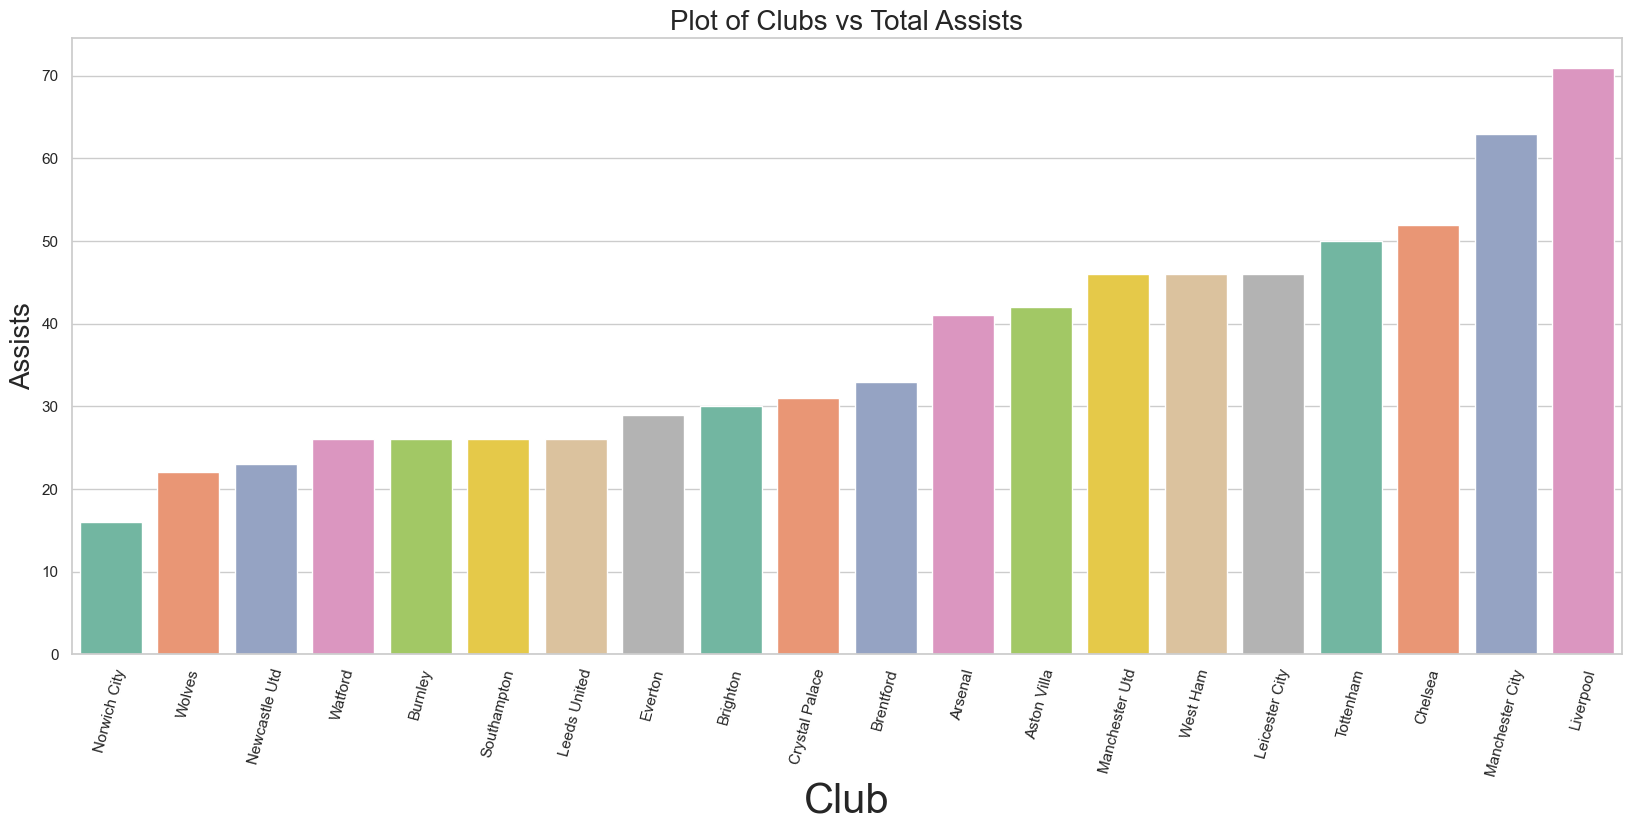

In [922]:
assists_by_clubs = pd.DataFrame(epl_df1.groupby('Squad', as_index = False)['Ast'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Ast', data = assists_by_clubs.sort_values(by = "Ast"), palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Assists", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Assists', fontsize = 20)

In [923]:
epl_df9.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,5,Arsenal,38,22,3,13,61,48,13,69,1.82,59.8,47.0,12.9,0.34,59665,Bukayo Saka - 11,Aaron Ramsdale
1,14,Aston Villa,38,13,6,19,52,54,-2,45,1.18,44.1,48.9,-4.8,-0.13,41681,Ollie Watkins - 11,Emiliano Martínez
2,13,Brentford,38,13,7,18,48,56,-8,46,1.21,47.7,49.2,-1.5,-0.04,16918,Ivan Toney - 12,David Raya
3,9,Brighton,38,12,15,11,42,44,-2,51,1.34,46.0,45.4,0.5,0.01,30966,Leandro Trossard Neal Maupay - 8,Robert Sánchez
4,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278,Maxwel Cornet - 9,Nick Pope


Text(0.5, 1.0, 'Plot of Clubs vs Total Points')

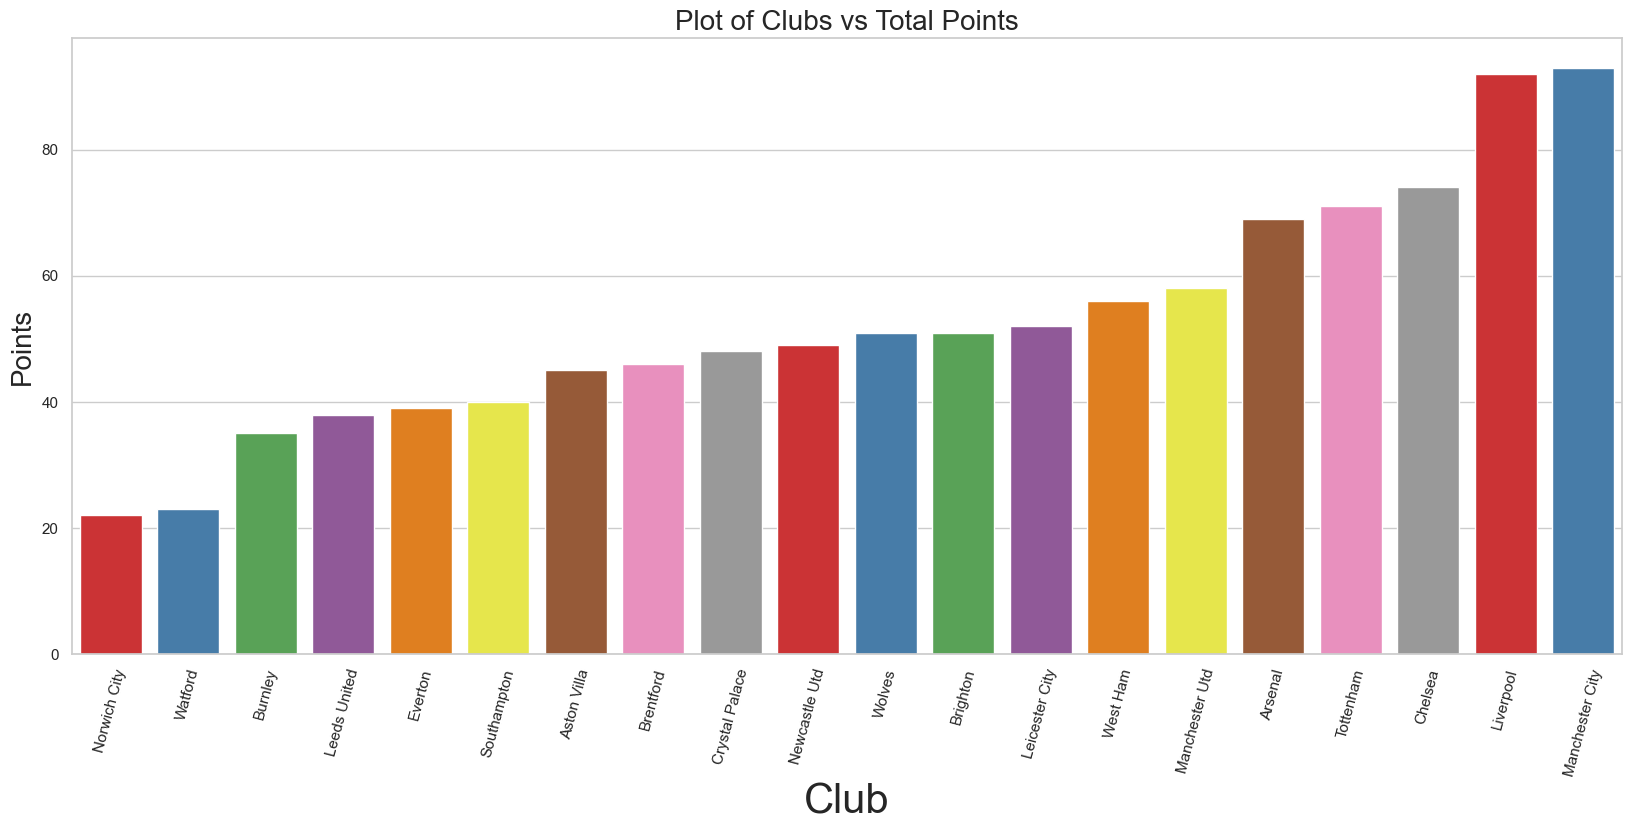

In [924]:
points_of_clubs = pd.DataFrame(epl_df9.groupby('Squad', as_index = False)['Pts'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Pts', data = points_of_clubs.sort_values(by = "Pts"), palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Points", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Points', fontsize = 20)

In [925]:
epl_df2.head()

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Pts
0,Norwich City,28.0,38.0,21.0,374.0,104.0,27.8,9.84,2.74,0.05,...,18.1,18.0,3.0,3.0,33.1,30.8,0.08,-12.1,-12.8,22.0
1,Watford,30.0,38.0,33.0,398.0,126.0,31.7,10.47,3.32,0.08,...,17.6,23.0,1.0,2.0,38.7,37.2,0.09,-5.7,-5.2,23.0
2,Burnley,23.0,38.0,32.0,406.0,117.0,28.8,10.68,3.08,0.08,...,16.4,14.0,1.0,2.0,39.0,37.4,0.09,-7.0,-6.4,35.0
3,Leeds United,29.0,38.0,42.0,485.0,142.0,29.3,12.76,3.74,0.08,...,17.7,13.0,5.0,5.0,47.1,43.3,0.09,-5.1,-6.3,38.0
4,Everton,33.0,38.0,42.0,431.0,127.0,29.5,11.34,3.34,0.08,...,17.1,18.0,6.0,7.0,42.7,37.5,0.09,-0.7,-1.5,39.0


Text(0.5, 1.0, 'Plot of Clubs vs Total Shots %')

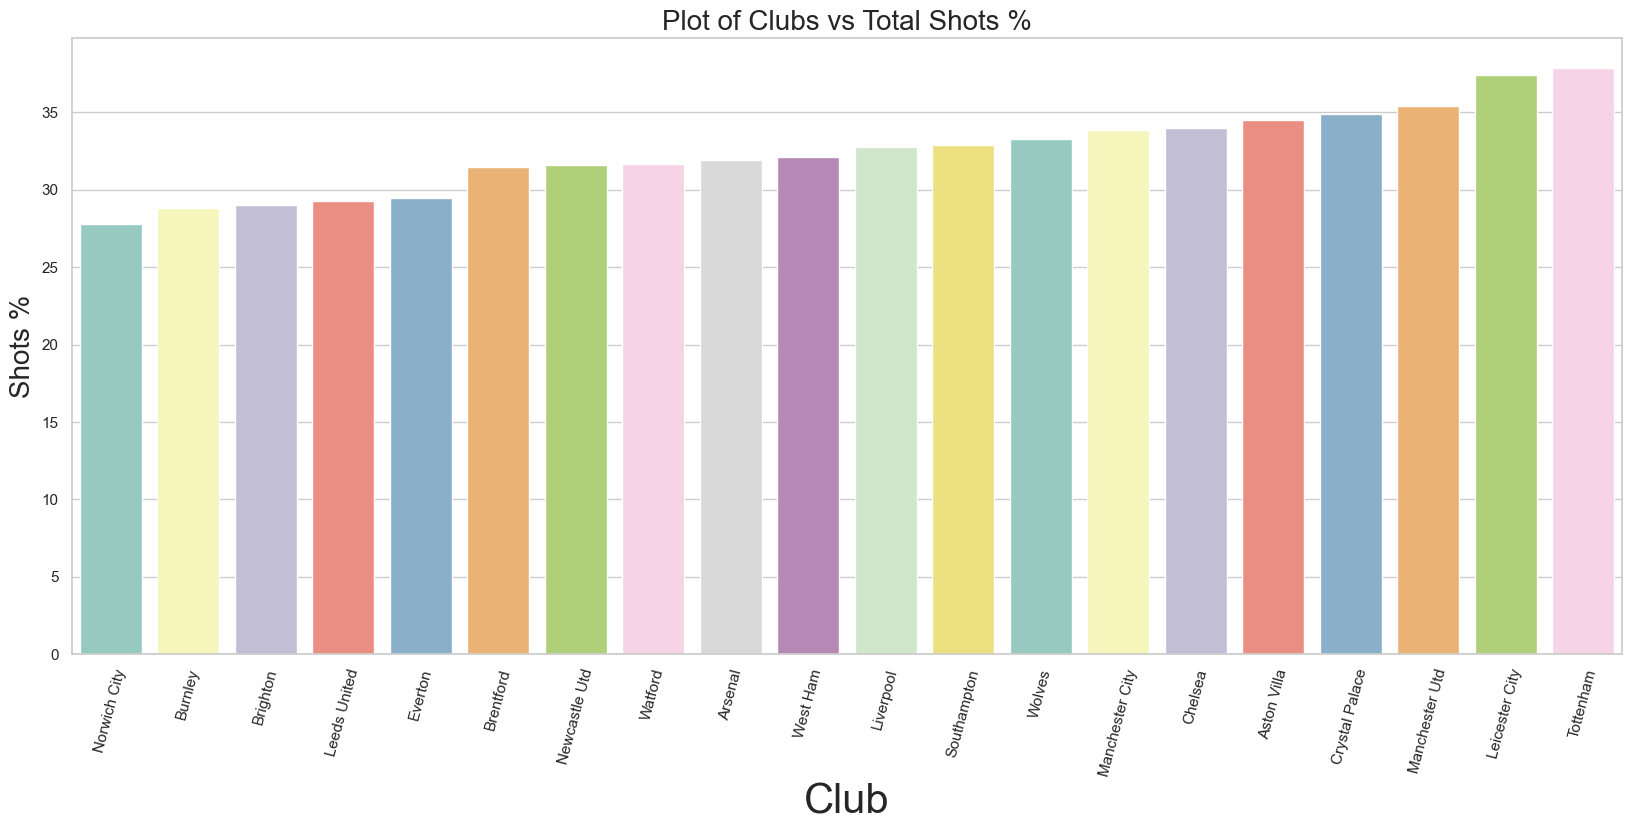

In [926]:
shots_by_clubs = pd.DataFrame(epl_df2.groupby('Squad', as_index = False)['SoT%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'SoT%', data = shots_by_clubs.sort_values(by = "SoT%"), palette='Set3')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Shots %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Shots %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Shots %')

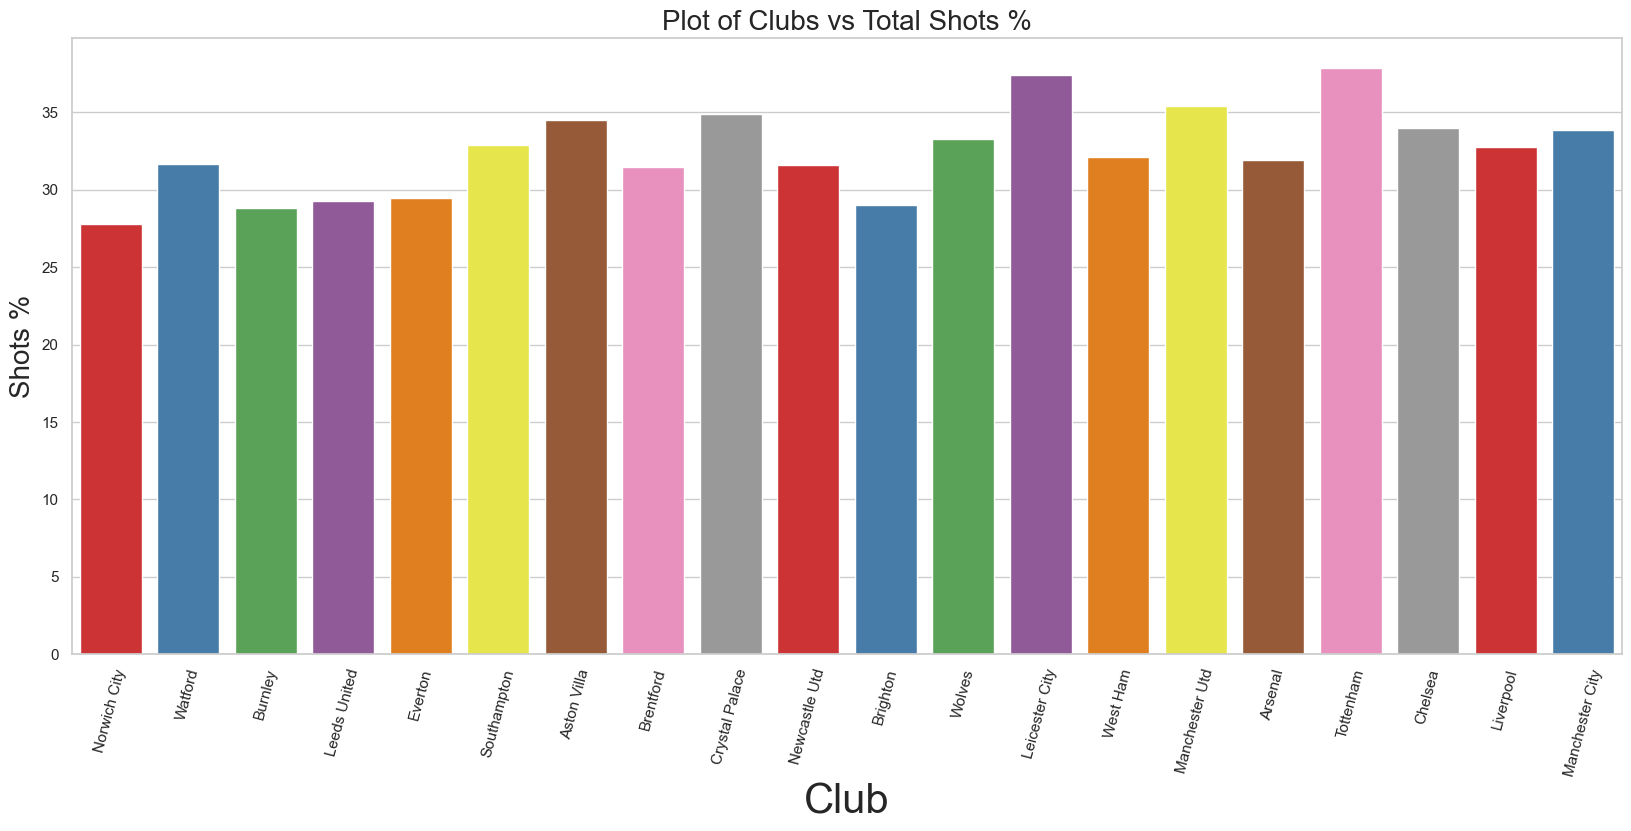

In [927]:
shots_by_clubs = pd.DataFrame(epl_df2.groupby('Squad', as_index = False, sort= False)['SoT%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'SoT%', data = shots_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Shots %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Shots %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Shots %')

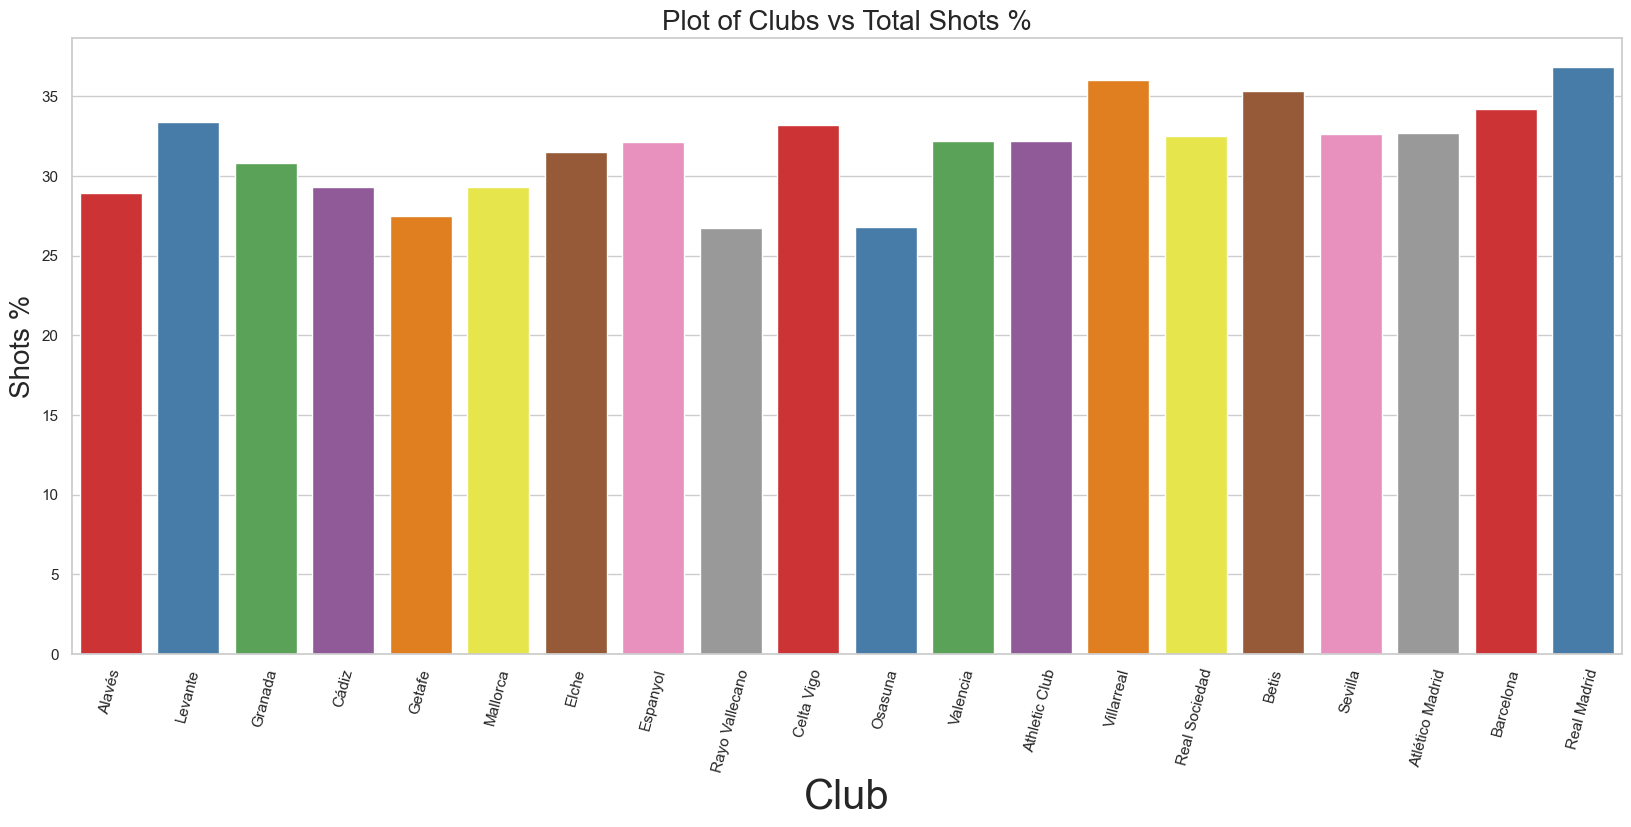

In [928]:
shots1_by_clubs = pd.DataFrame(laliga_df2.groupby('Squad', as_index = False, sort= False)['SoT%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'SoT%', data = shots1_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Shots %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Shots %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Completed Pass %')

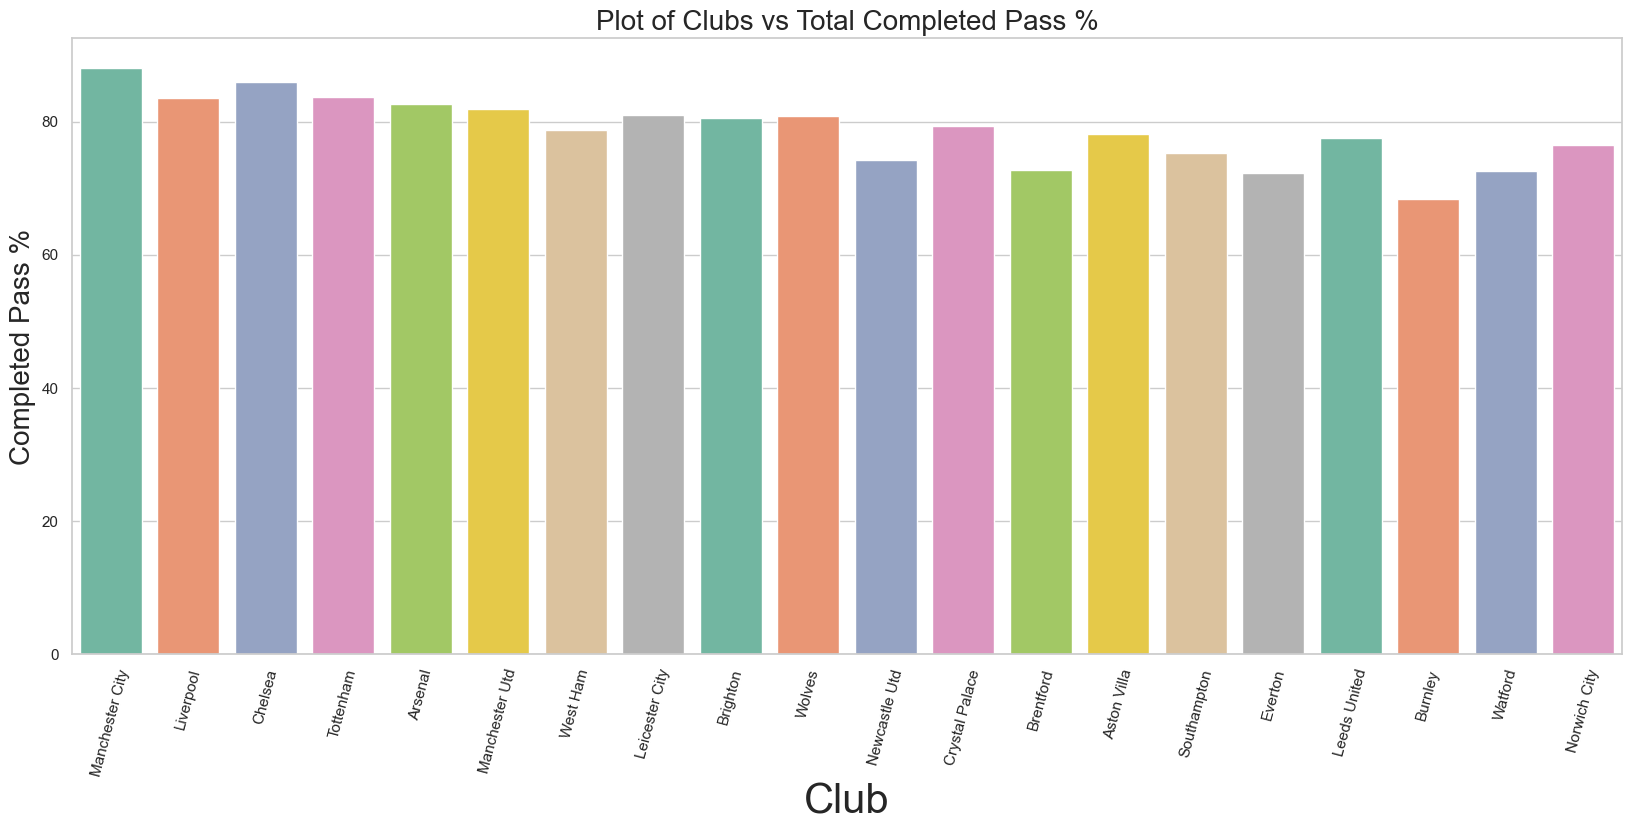

In [929]:
pass_by_clubs = pd.DataFrame(epl_df4.groupby('Squad', as_index = False, sort= False)['Cmp%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Cmp%', data = pass_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Completed Pass %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Completed Pass %')

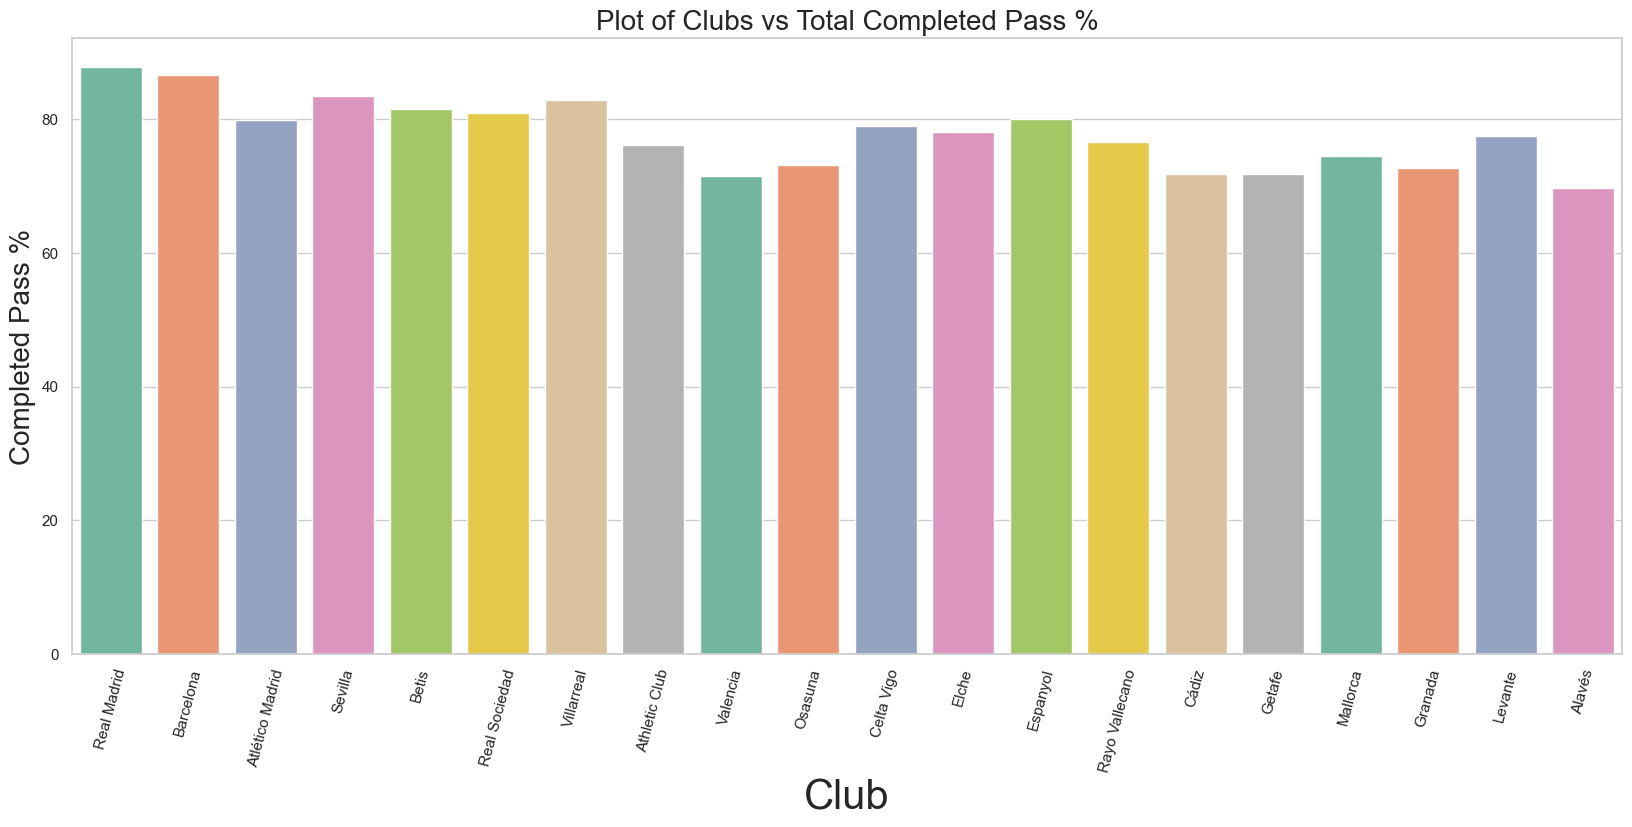

In [930]:
pass1_by_clubs = pd.DataFrame(laliga_df4.groupby('Squad', as_index = False, sort= False)['Cmp%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Cmp%', data = pass1_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Completed Pass %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Short Completed Pass %')

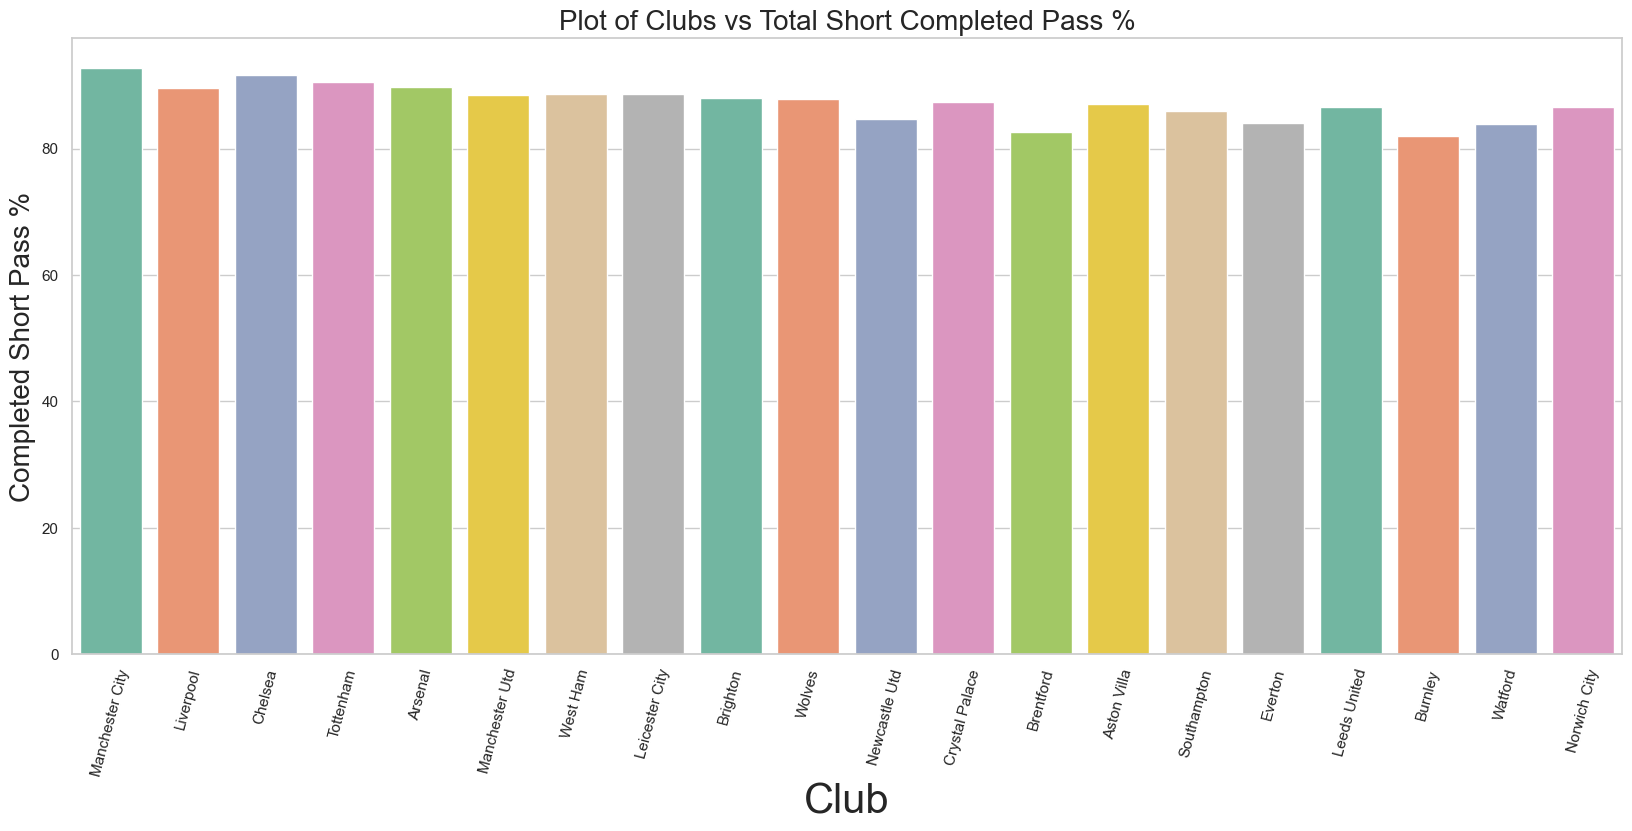

In [961]:
pass_by_clubs = pd.DataFrame(epl_df4.groupby('Squad', as_index = False, sort= False)['Cmp1%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Cmp1%', data = pass_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Short Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Short Completed Pass %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Completed Pass %')

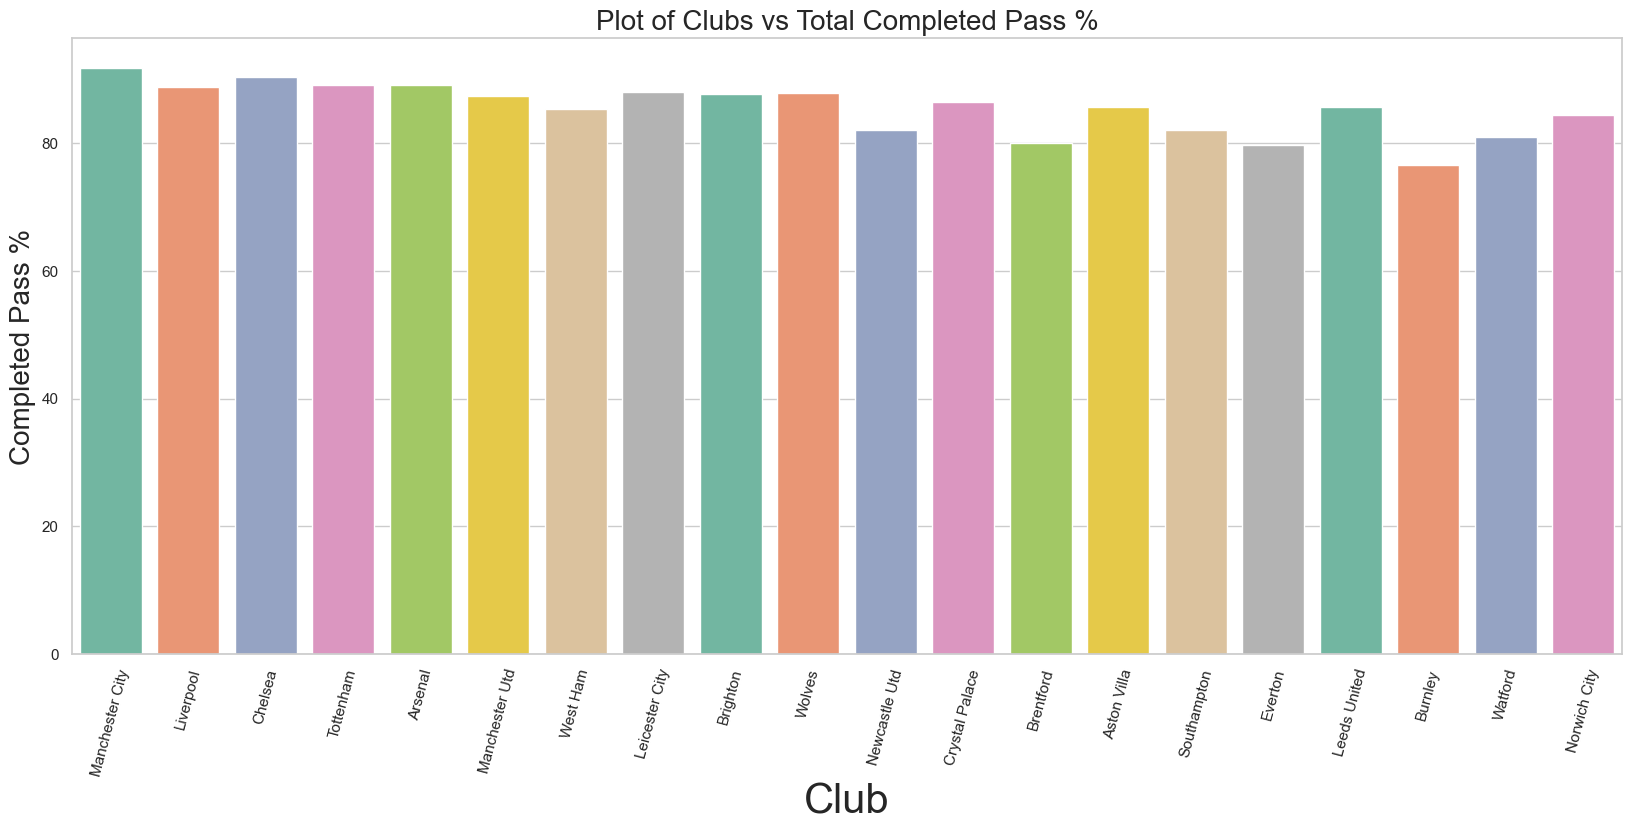

In [932]:
pass_by_clubs = pd.DataFrame(epl_df4.groupby('Squad', as_index = False, sort= False)['Cmp2%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Cmp2%', data = pass_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Completed Pass %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Completed Pass %')

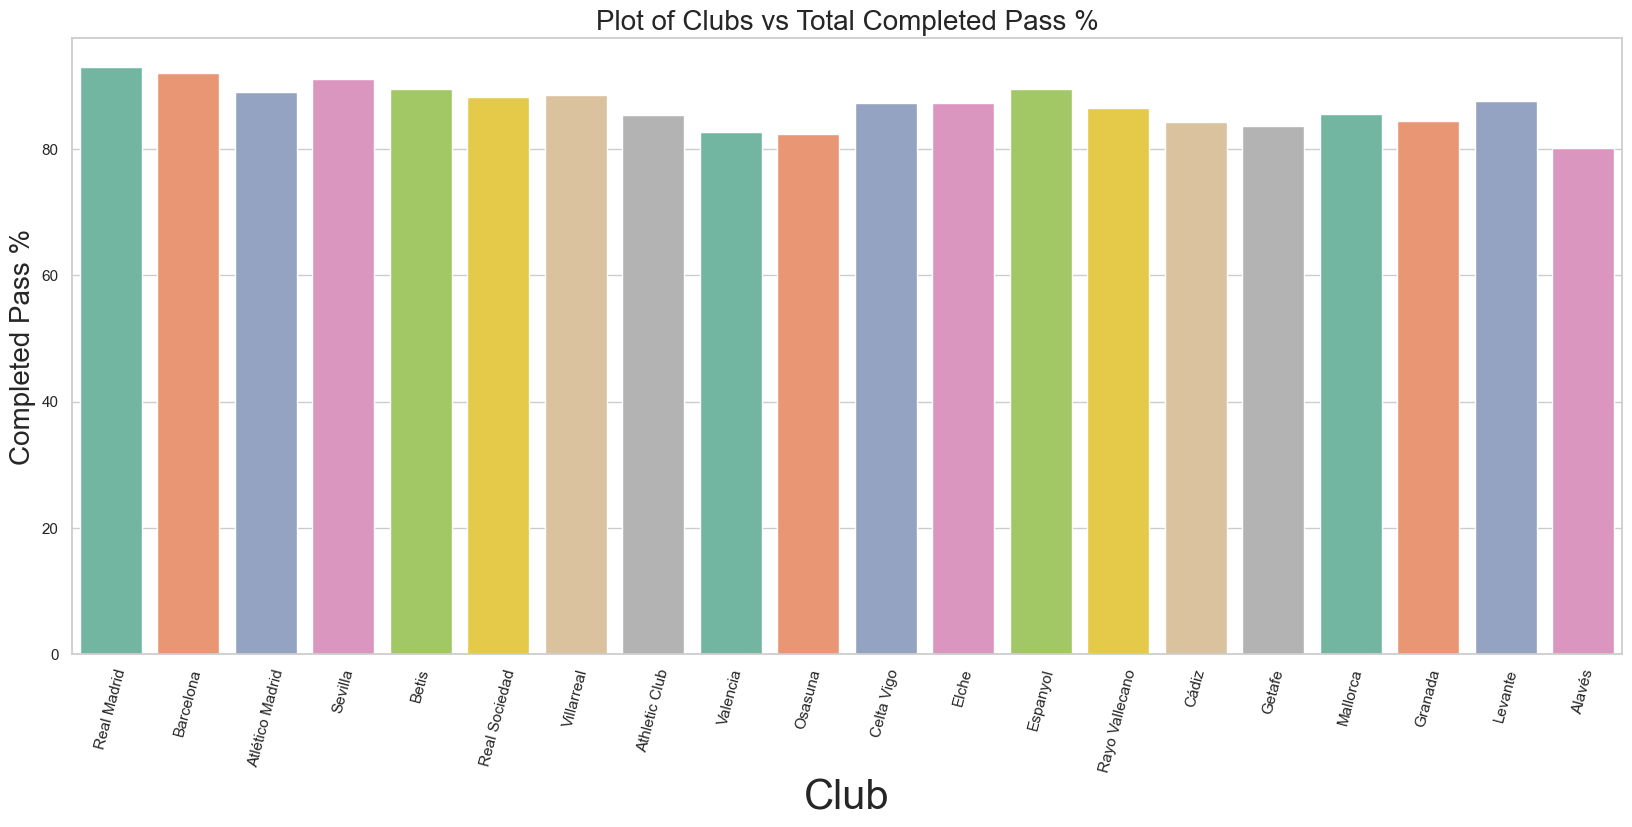

In [933]:
pass1_by_clubs = pd.DataFrame(laliga_df4.groupby('Squad', as_index = False, sort= False)['Cmp1%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Cmp1%', data = pass1_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Completed Pass %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Completed Pass %')

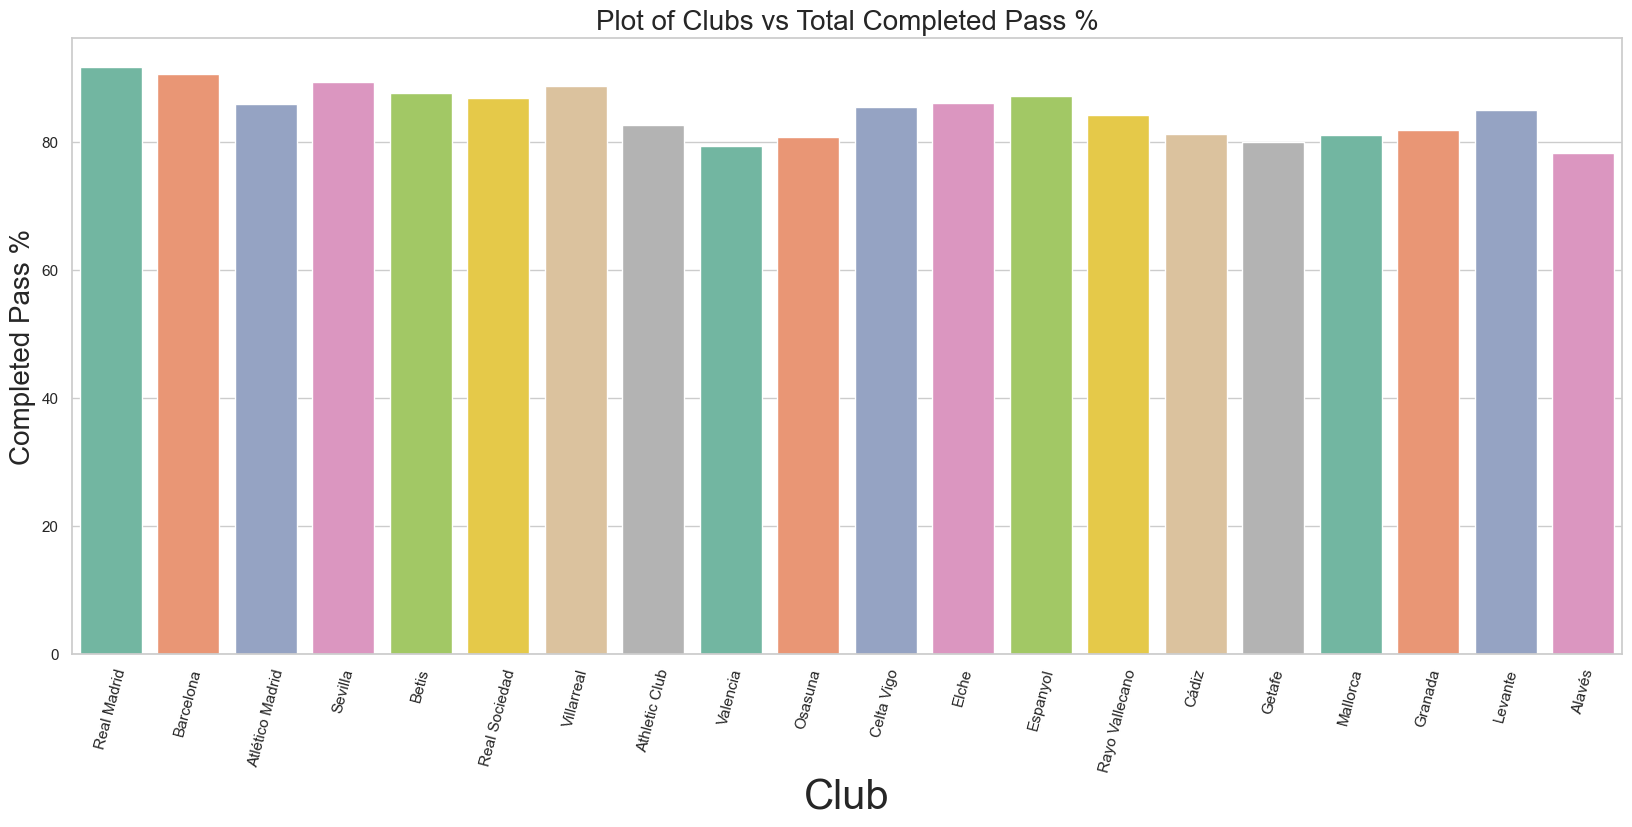

In [934]:
pass1_by_clubs = pd.DataFrame(laliga_df4.groupby('Squad', as_index = False, sort= False)['Cmp2%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Cmp2%', data = pass1_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Completed Pass %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Completed Pass %')

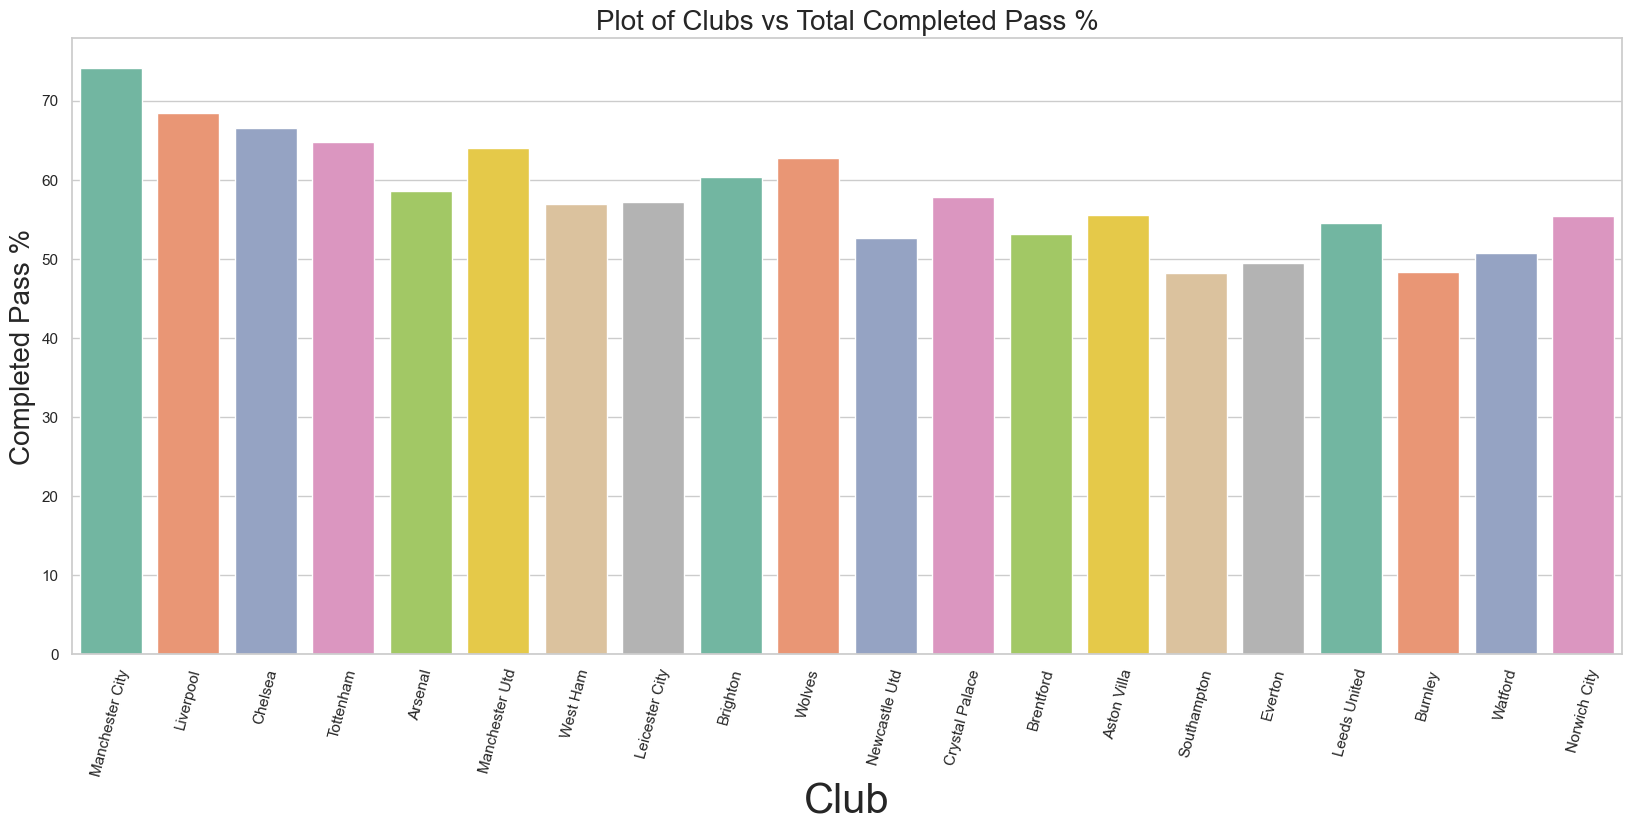

In [935]:
pass_by_clubs = pd.DataFrame(epl_df4.groupby('Squad', as_index = False, sort= False)['Cmp3%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Cmp3%', data = pass_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Completed Pass %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Completed Pass %')

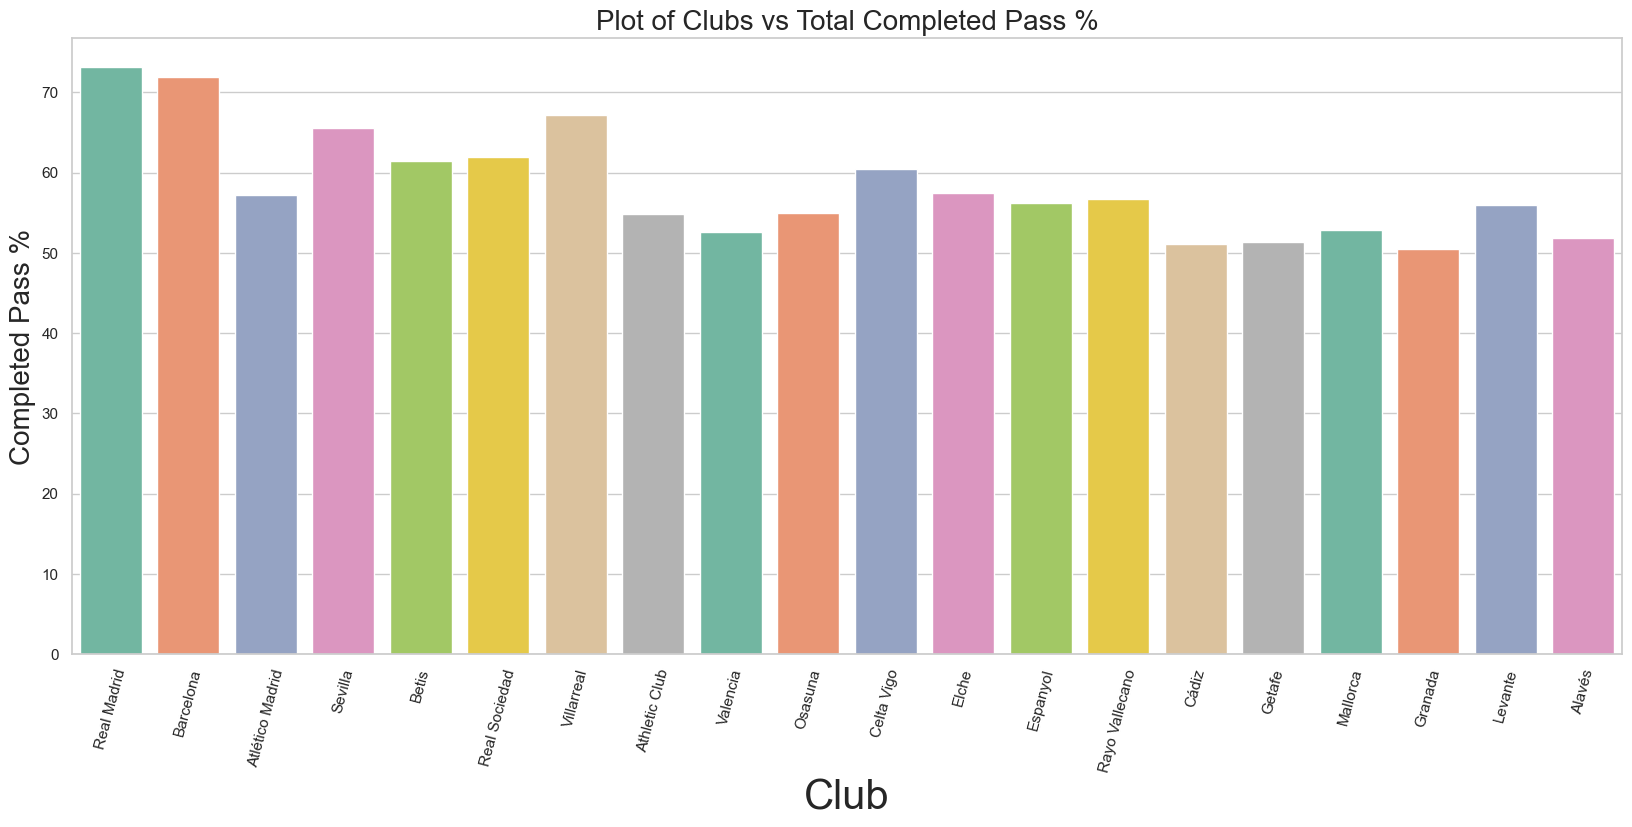

In [936]:
pass1_by_clubs = pd.DataFrame(laliga_df4.groupby('Squad', as_index = False, sort= False)['Cmp3%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Cmp3%', data = pass1_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Completed Pass %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Completed Poss %')

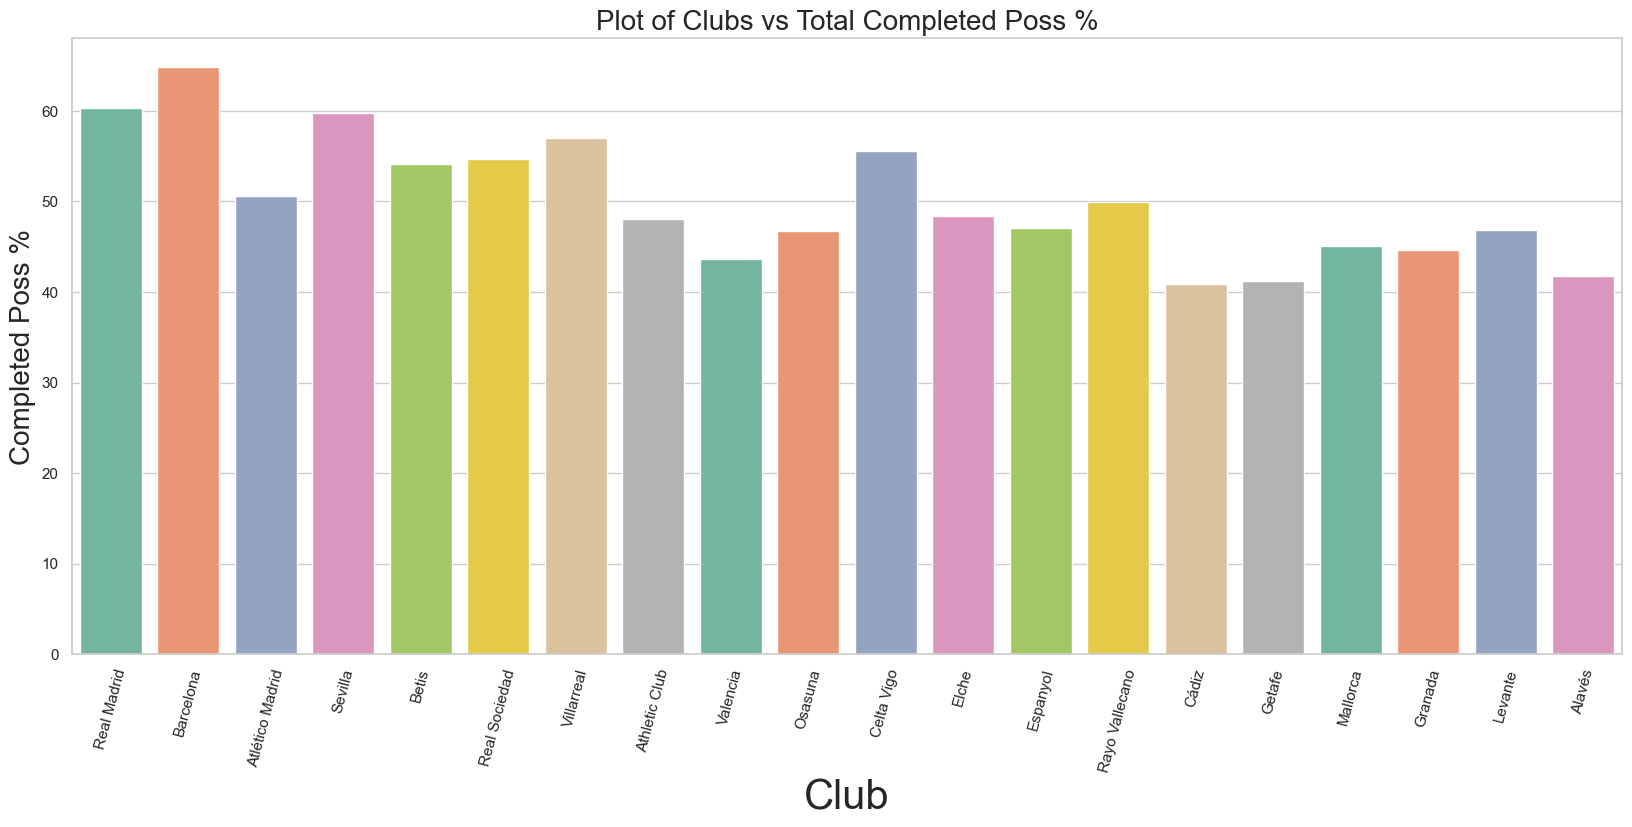

In [962]:
poss1_by_clubs = pd.DataFrame(laliga_df3.groupby('Squad', as_index = False, sort= False)['Poss'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Poss', data = poss1_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Poss %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Completed Poss %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Poss')

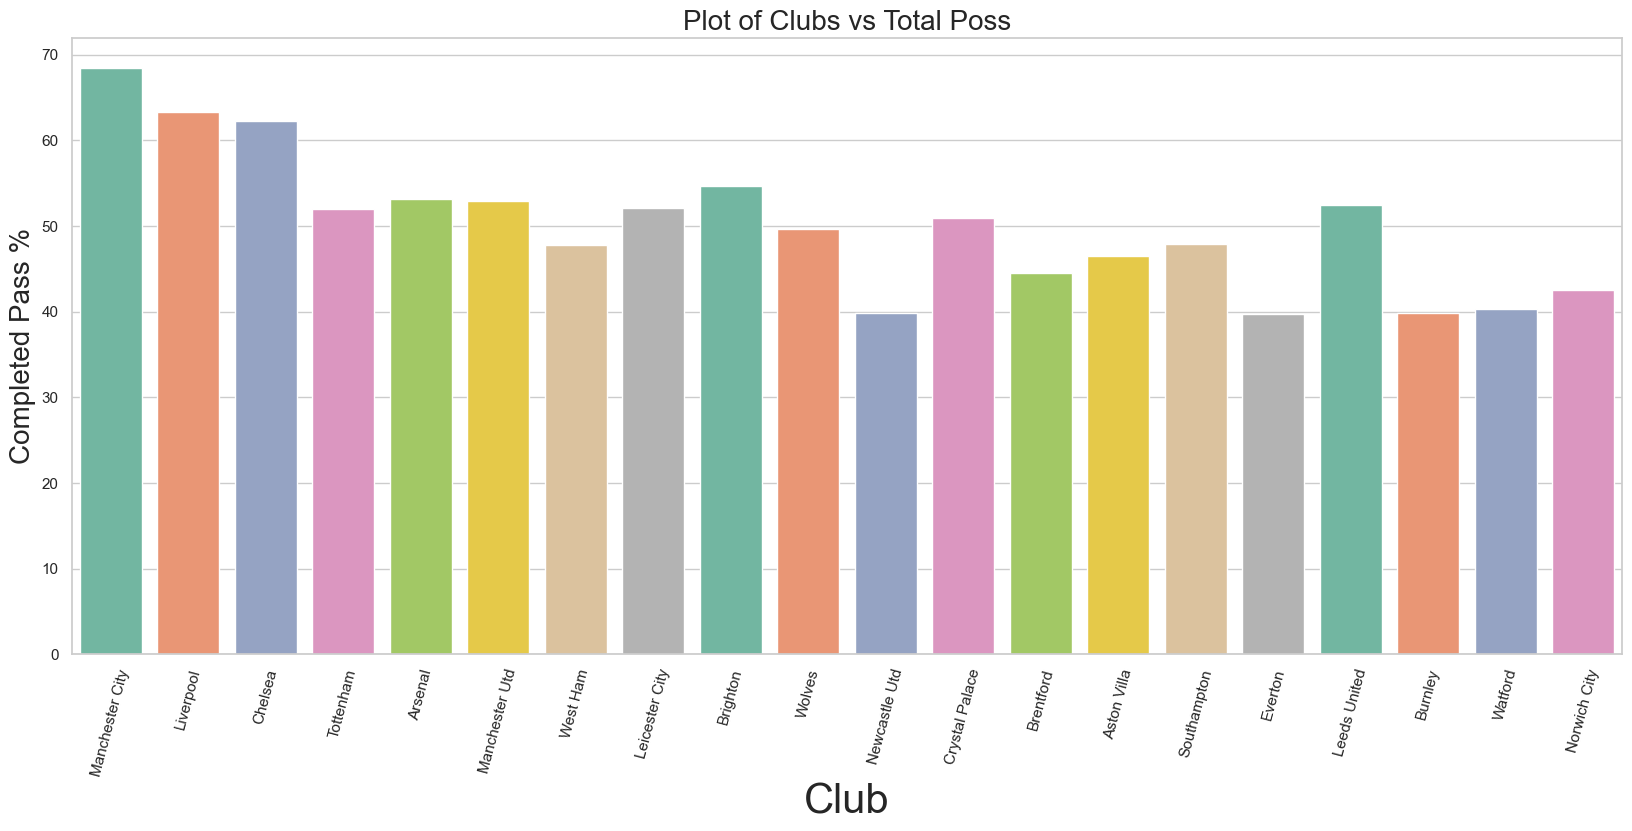

In [938]:
poss_by_clubs = pd.DataFrame(epl_df3.groupby('Squad', as_index = False, sort= False)['Poss'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Poss', data = poss_by_clubs, palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Completed Pass %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Poss', fontsize = 20)

In [939]:
Total_Goals = epl_df1['Gls'].sum()
print(Total_Goals)

1037


In [940]:
Total_Goals1 = laliga_df2['Gls'].sum()
print(Total_Goals1)

929


In [941]:
Total_Assists = epl_df1['Ast'].sum()
print(Total_Assists)

745


In [942]:
Total_Assists1 = laliga_df1['Ast'].sum()
print(Total_Assists1)

664


In [943]:
# epl_df1['Age'].value_counts().plot.pie(figsize=(12,8),subplots=True)# 

In [944]:
# laliga_df1['Age'].value_counts().plot.pie(figsize=(12,8),subplots=True)

In [945]:
avg_epl_age = epl_df1["Age"].mean()
print(avg_epl_age)

26.805


In [946]:
avg_laliga_age = laliga_df1["Age"].mean()
print(avg_laliga_age)

27.609999999999996


In [947]:

  
# plot between 2 attributes
# plt.bar(epl_df1['Squad'], epl_df1['Age'])
# plt.xlabel("Squad")
# plt.ylabel("Age")
# plt.show()

In [948]:
# plt.bar(laliga_df1['Squad'], laliga_df1['Age'])
# plt.xlabel("Squad")
# plt.ylabel("Age")
# plt.show()

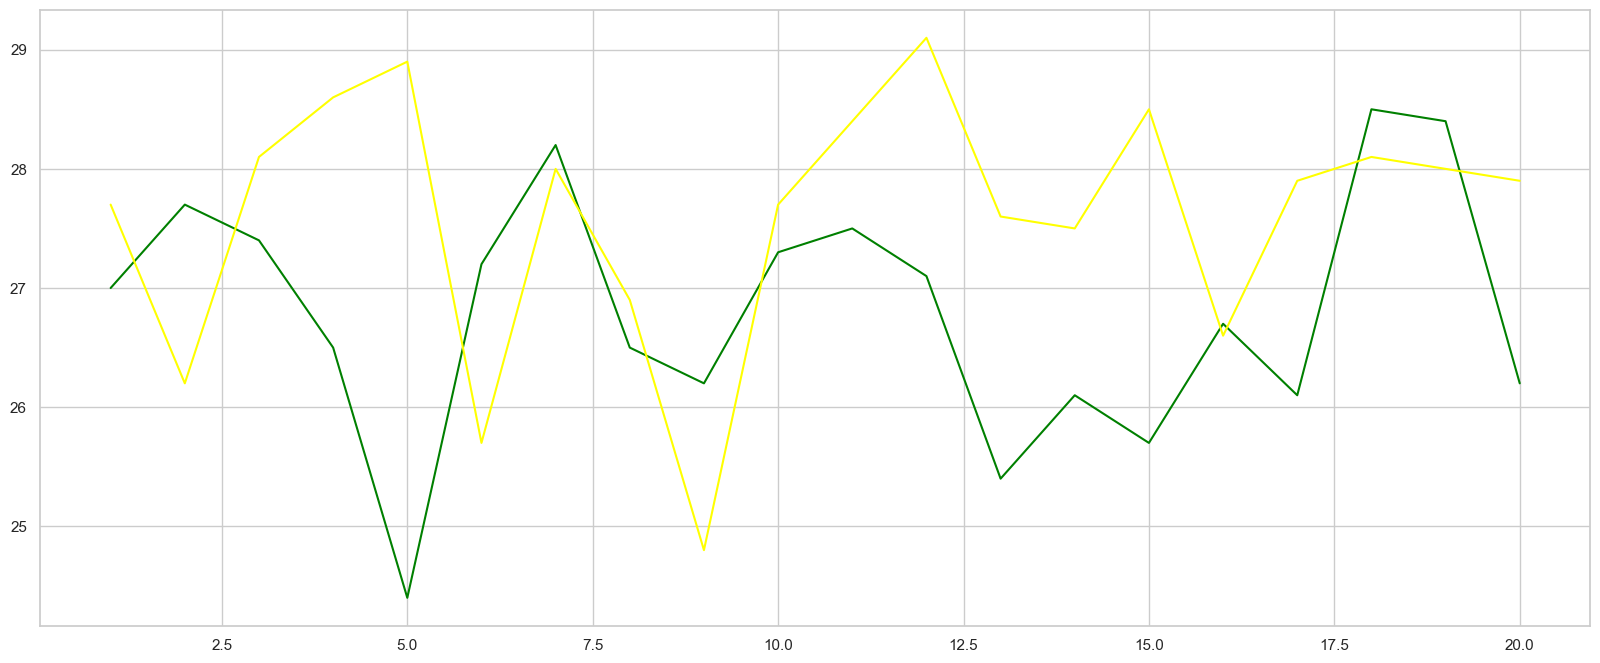

In [949]:
plt.plot(age_df["Squad1"], age_df["Age1"], 'green')
plt.plot(age_df["Squad1"], age_df["Age2"], 'yellow')


In [963]:
# plt.plot(age_df["Squad1"], age_df["Age1"])

Text(0.5, 1.0, 'Plot of Clubs vs Total Tackle %')

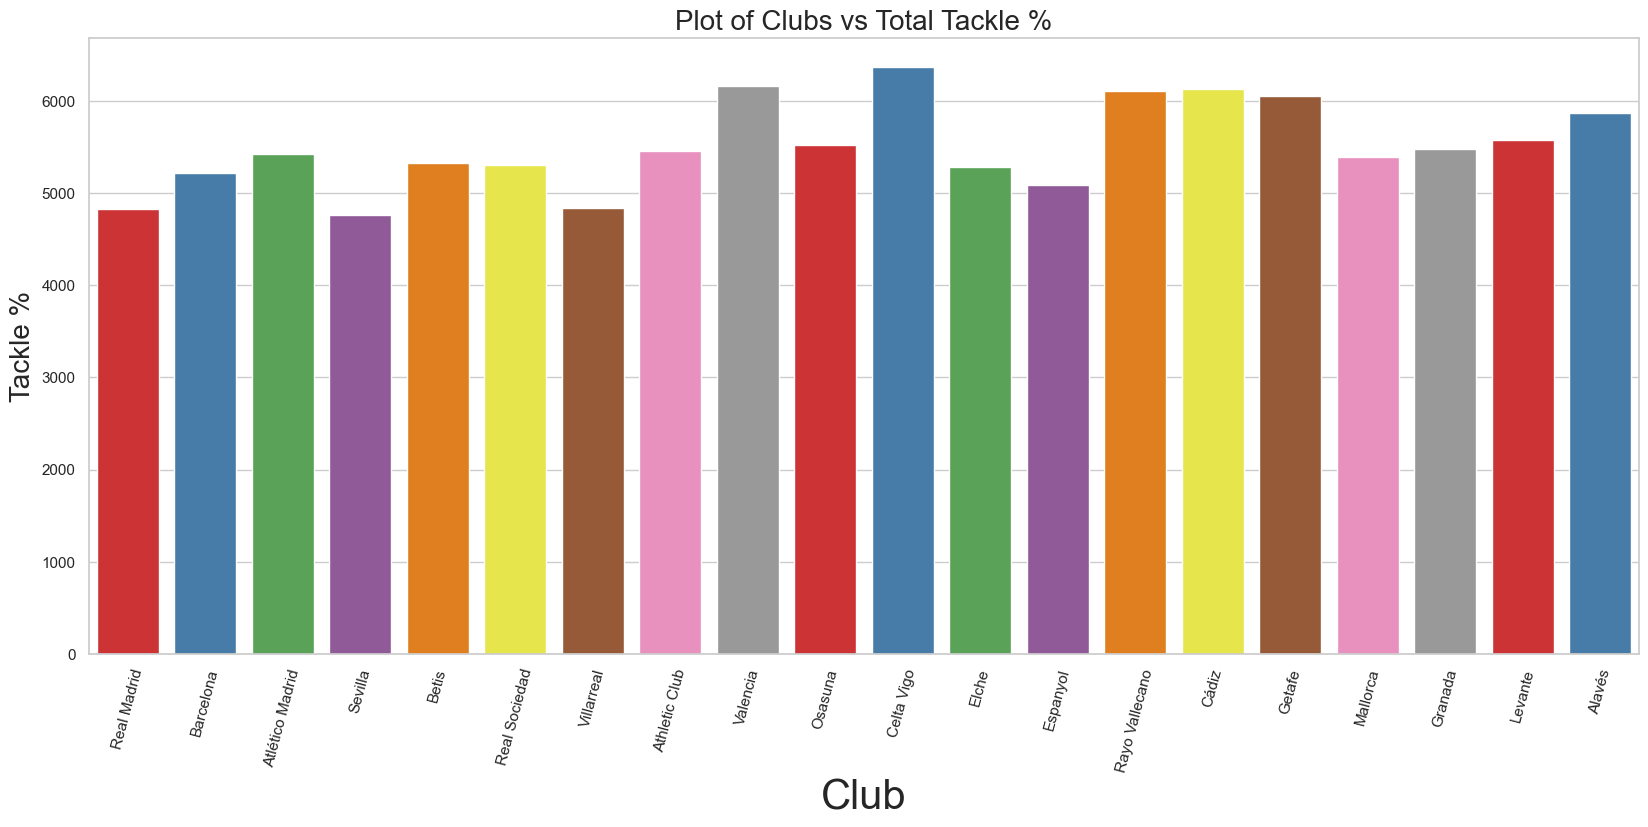

In [951]:
press_by_clubs1 = pd.DataFrame(laliga_df9.groupby('Squad', as_index = False, sort= False)['Press'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Press', data = press_by_clubs1, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Tackle %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Tackle %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Tackle %')

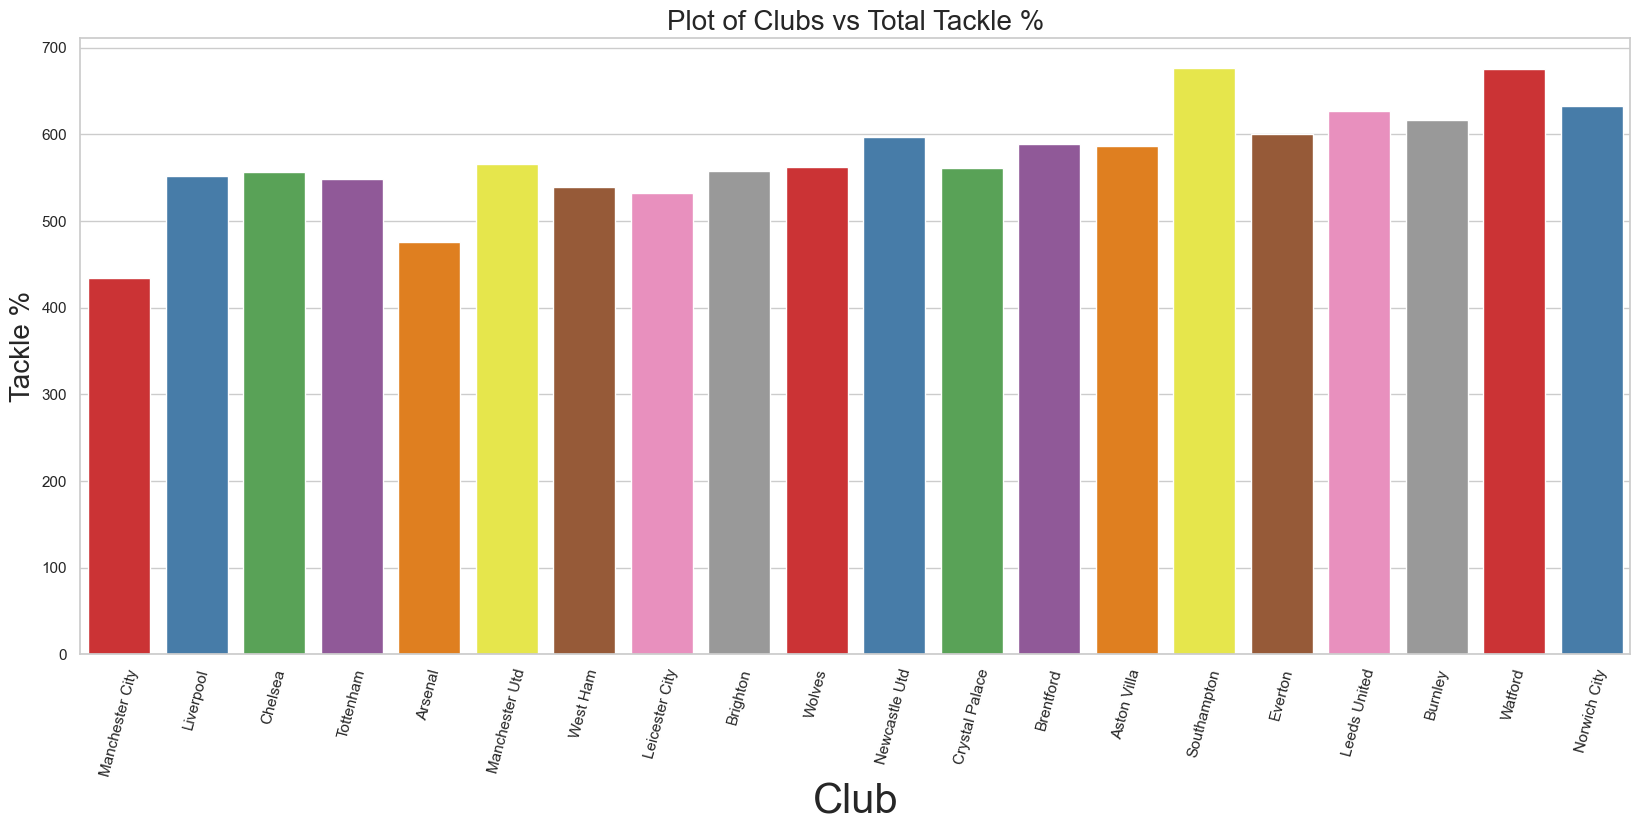

In [952]:
press_by_clubs = pd.DataFrame(epl_df8.groupby('Squad', as_index = False, sort= False)['Int'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Int', data = press_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Tackle %", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Tackle %', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Crosses')

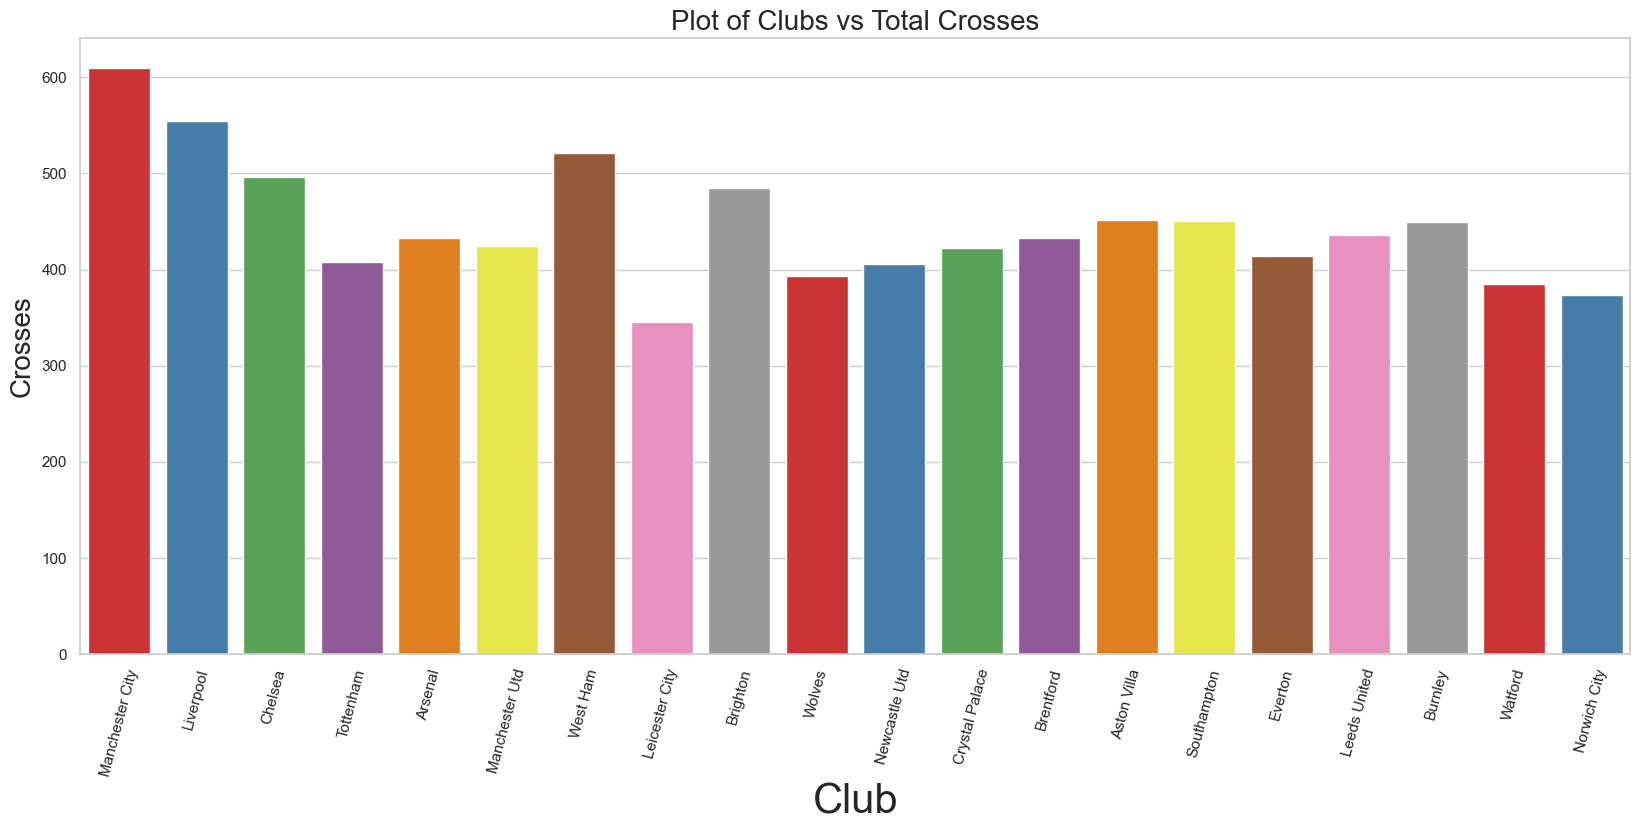

In [953]:
cross_by_clubs = pd.DataFrame(epl_df6.groupby('Squad', as_index = False, sort= False)['Crs'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Crs', data = cross_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Crosses", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Crosses', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Crosses')

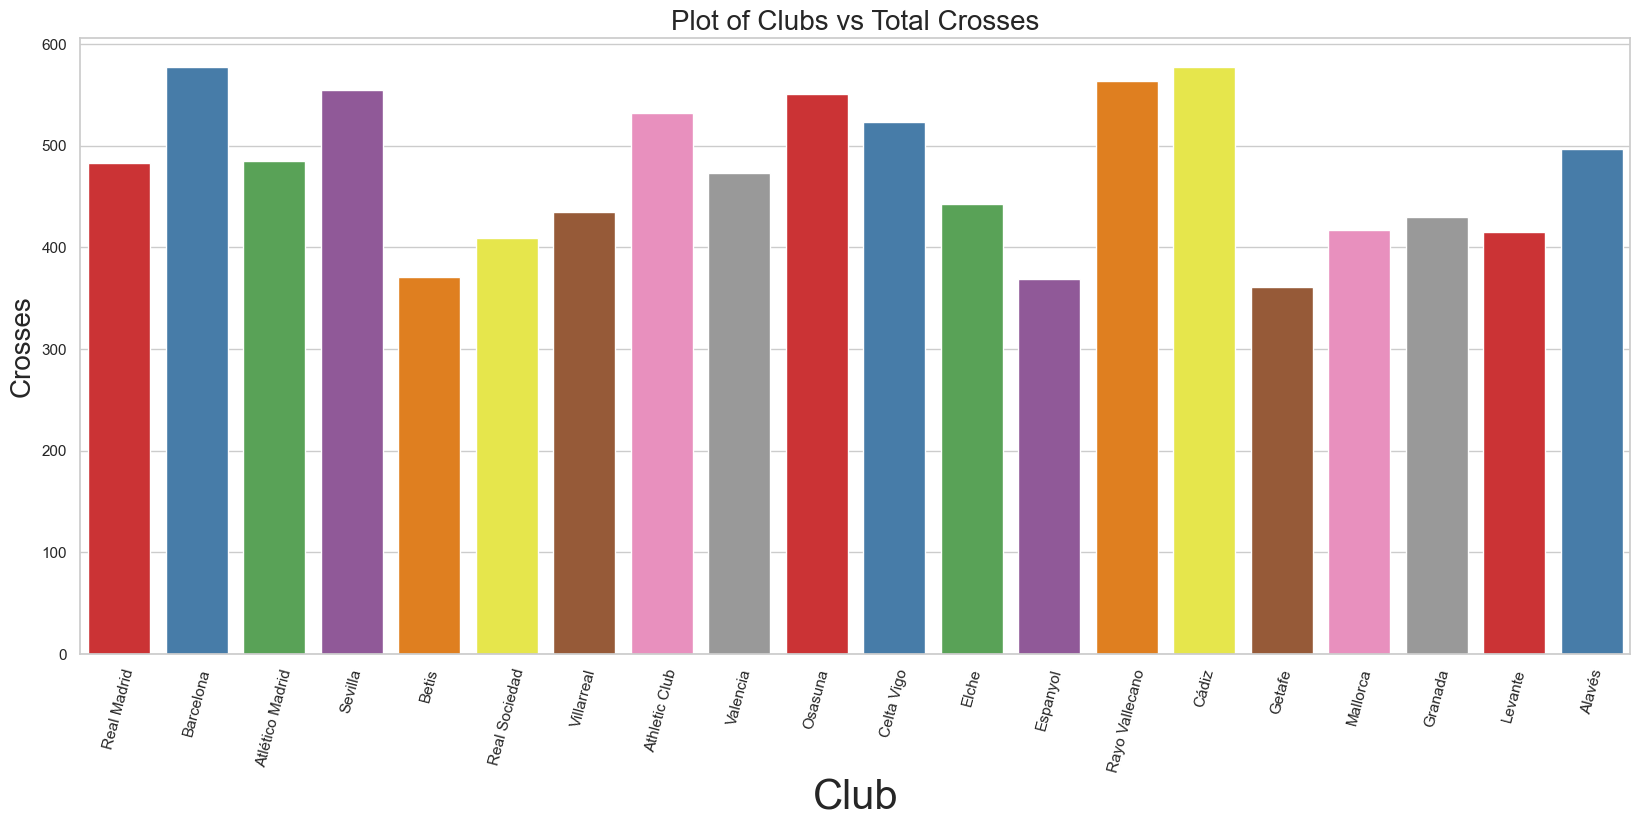

In [954]:
cross_by_clubs1 = pd.DataFrame(laliga_df6.groupby('Squad', as_index = False, sort= False)['Crs'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Crs', data = cross_by_clubs1, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Crosses", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Crosses', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Crosses')

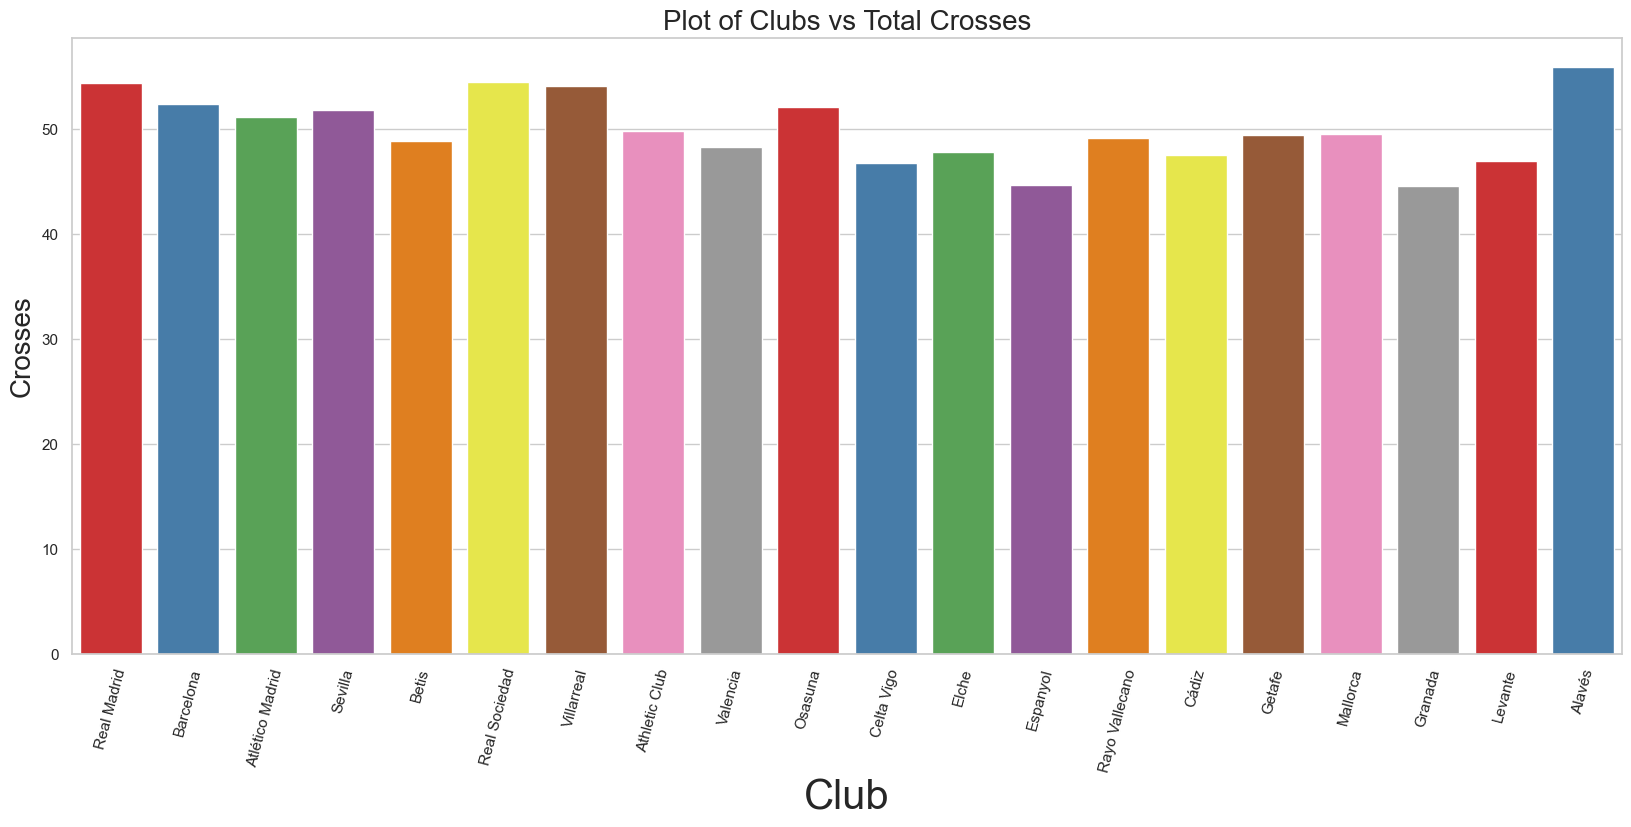

In [955]:
aerials_by_clubs1 = pd.DataFrame(laliga_df6.groupby('Squad', as_index = False, sort= False)['Won%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Won%', data = aerials_by_clubs1, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Crosses", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Crosses', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Total Crosses')

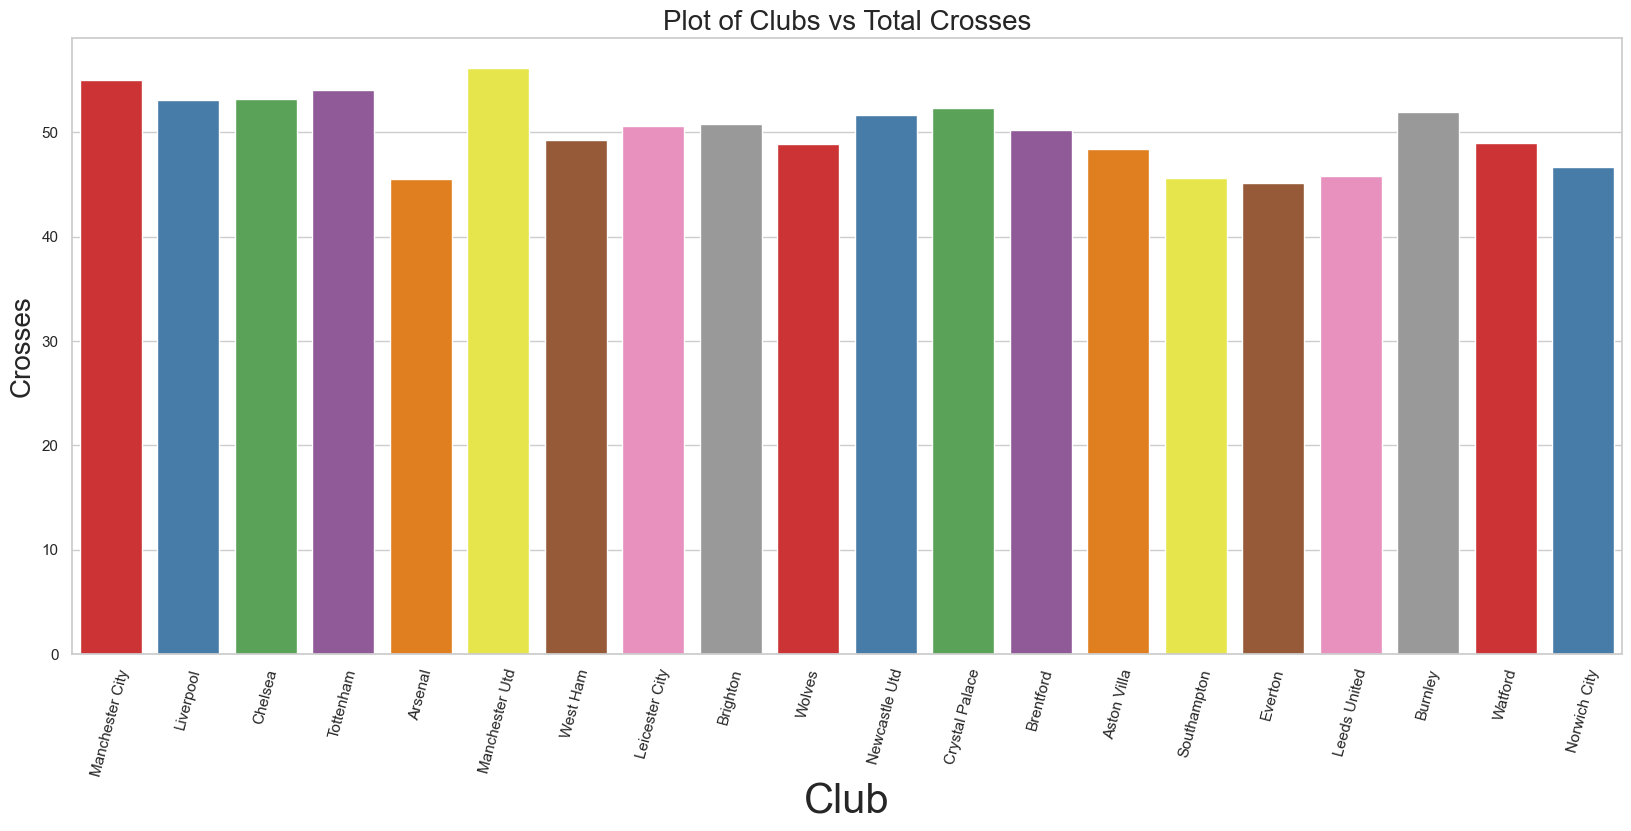

In [956]:
aerials_by_clubs = pd.DataFrame(epl_df6.groupby('Squad', as_index = False, sort= False)['Won%'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Won%', data = aerials_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Crosses", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Crosses', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

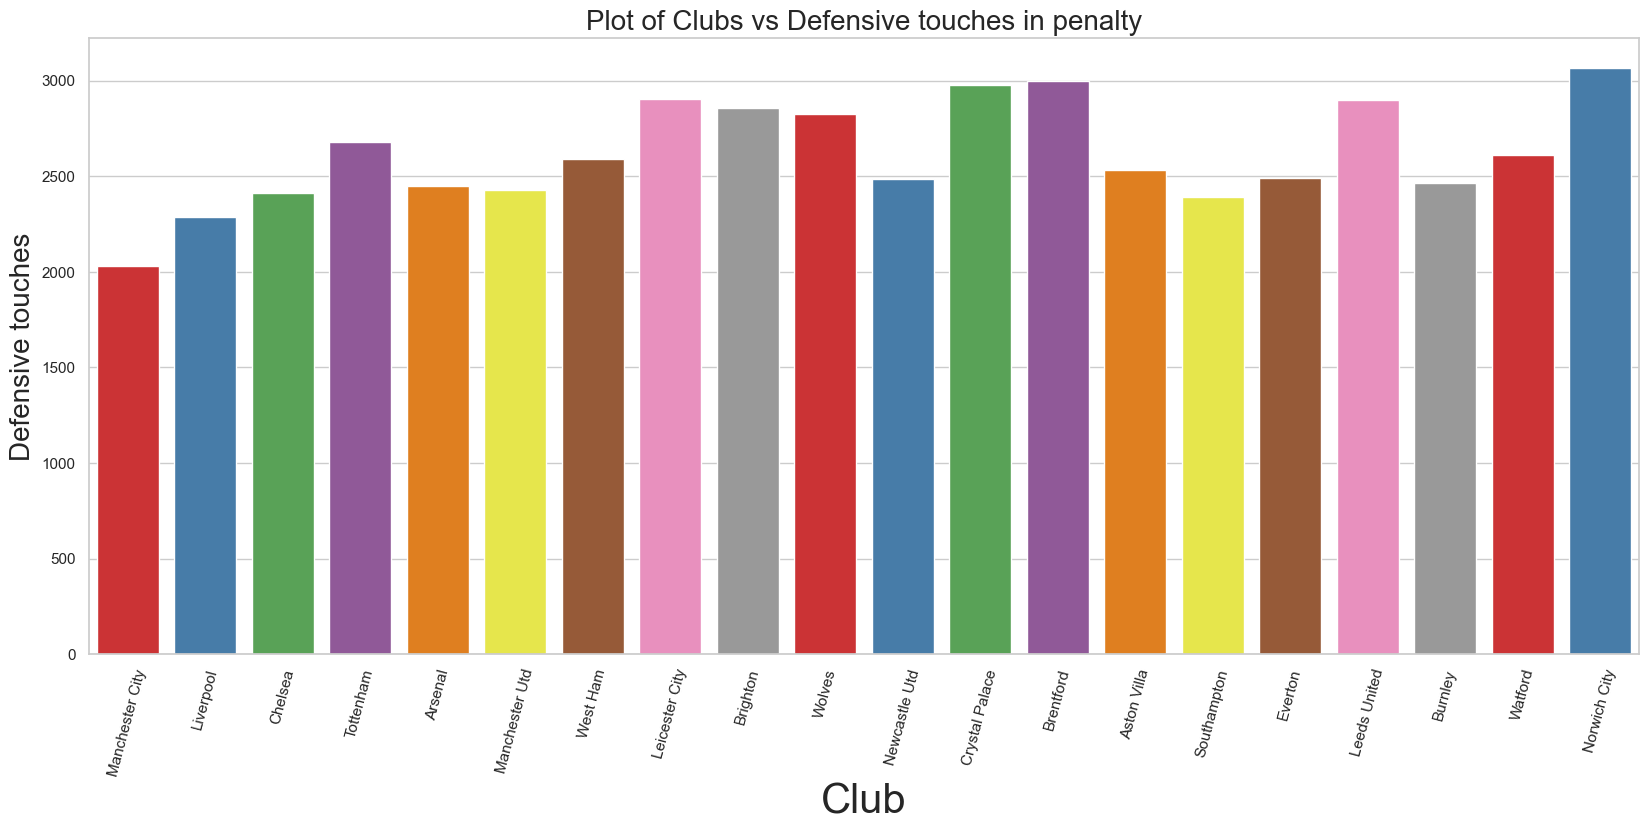

In [966]:
# def pen, att pen, mid 3rd, att 3rd
defpen_by_clubs = pd.DataFrame(epl_df3.groupby('Squad', as_index = False, sort= False)['Def Pen'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Def Pen', data = defpen_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

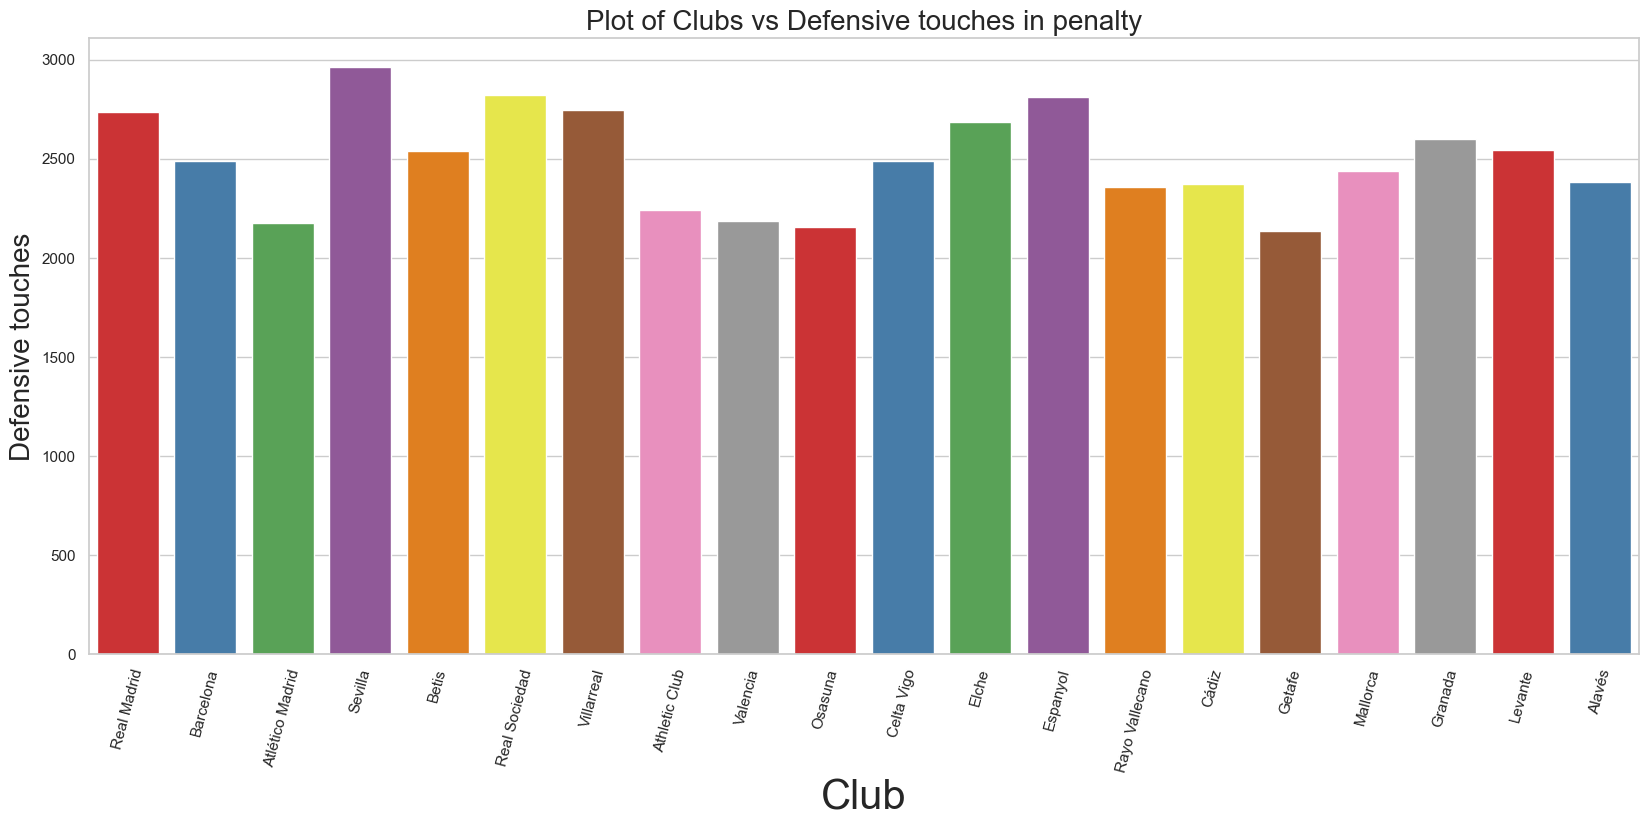

In [967]:
defpen_by_clubs1 = pd.DataFrame(laliga_df3.groupby('Squad', as_index = False, sort= False)['Def Pen'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Def Pen', data = defpen_by_clubs1, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

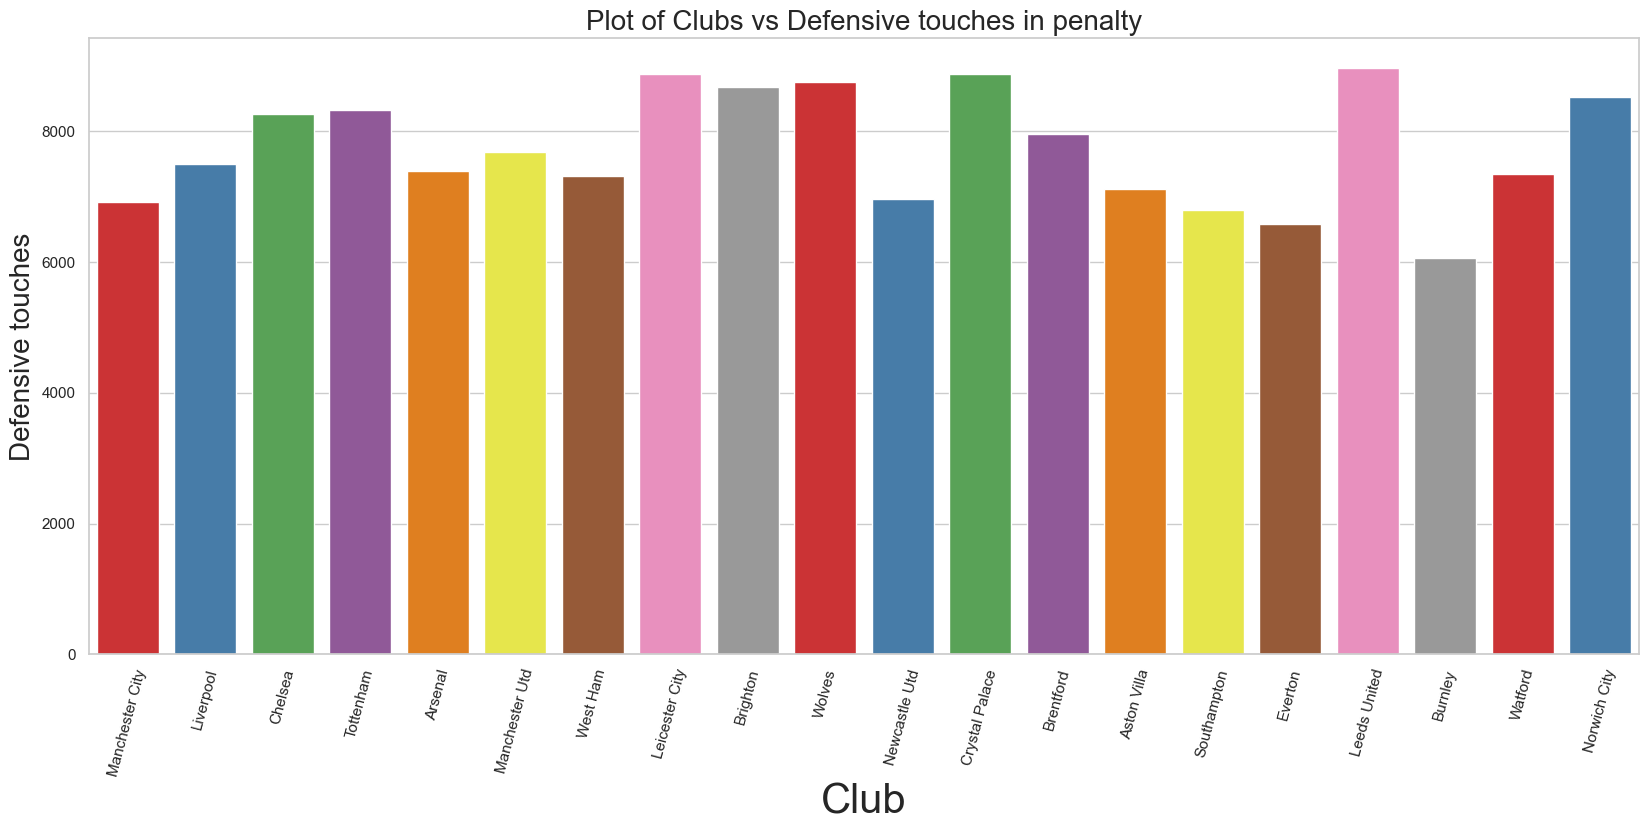

In [969]:
def3rd_by_clubs = pd.DataFrame(epl_df3.groupby('Squad', as_index = False, sort= False)['Def 3rd'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Def 3rd', data = def3rd_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

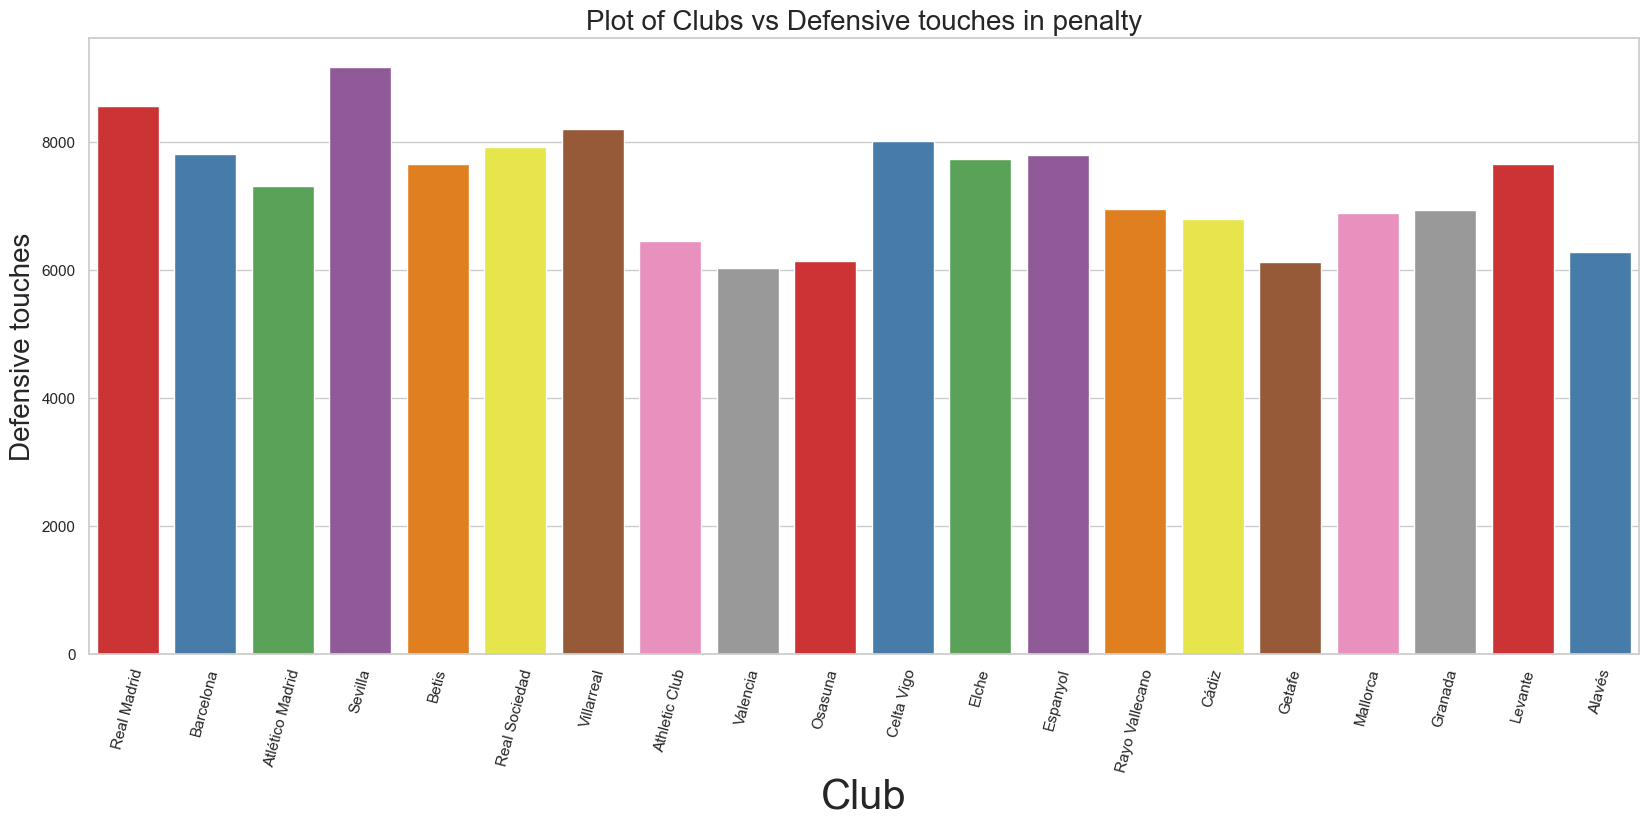

In [970]:
def3rd_by_clubs = pd.DataFrame(laliga_df3.groupby('Squad', as_index = False, sort= False)['Def 3rd'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Def 3rd', data = def3rd_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

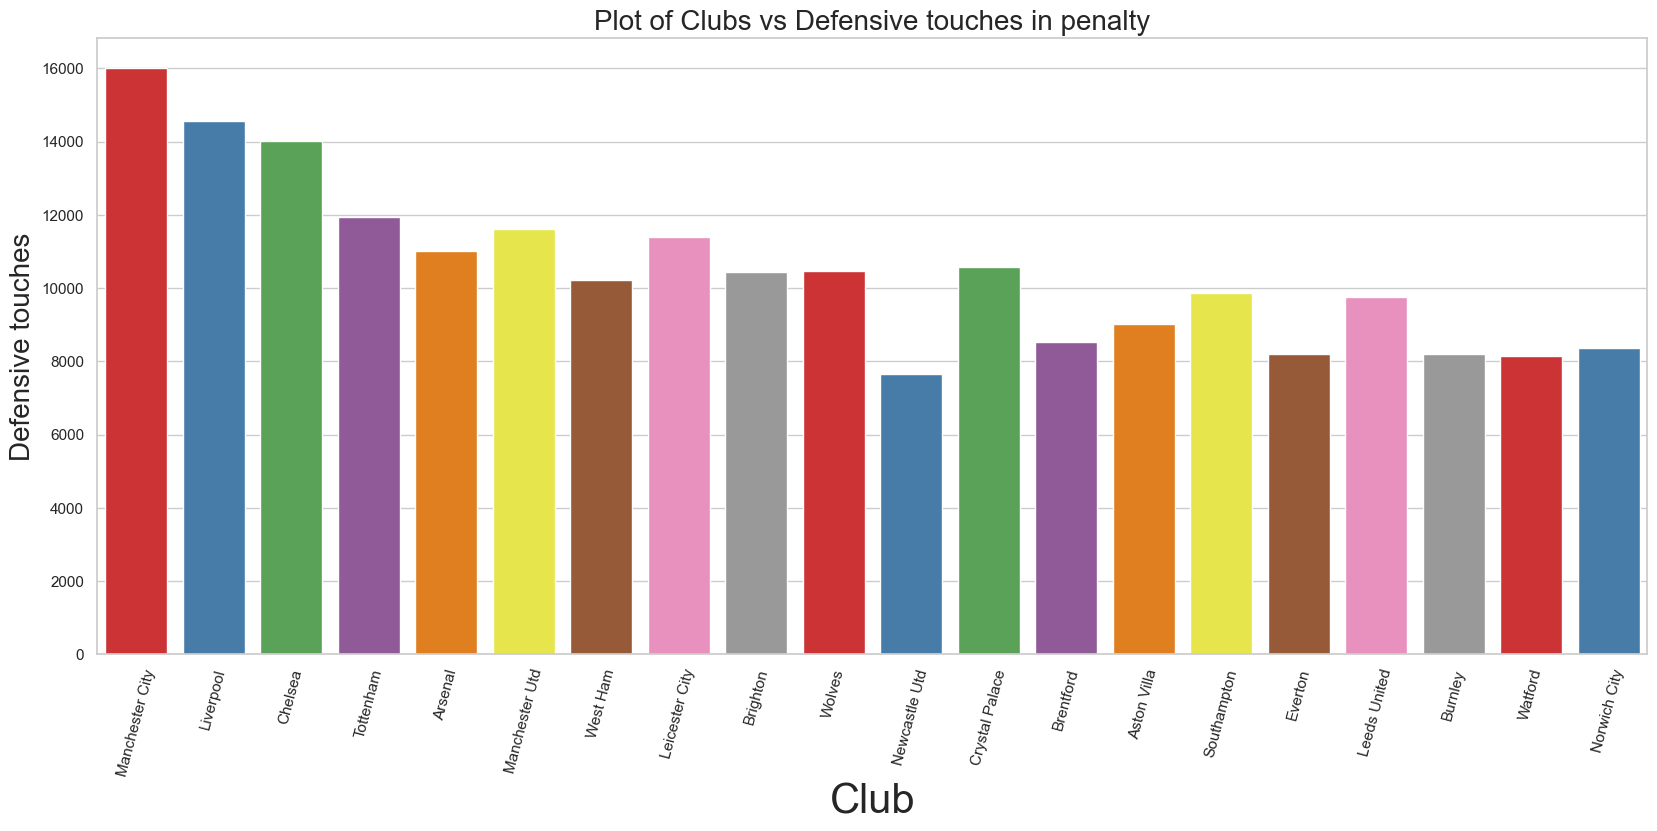

In [972]:
mid3rd_by_clubs = pd.DataFrame(epl_df3.groupby('Squad', as_index = False, sort= False)['Mid 3rd'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Mid 3rd', data = mid3rd_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

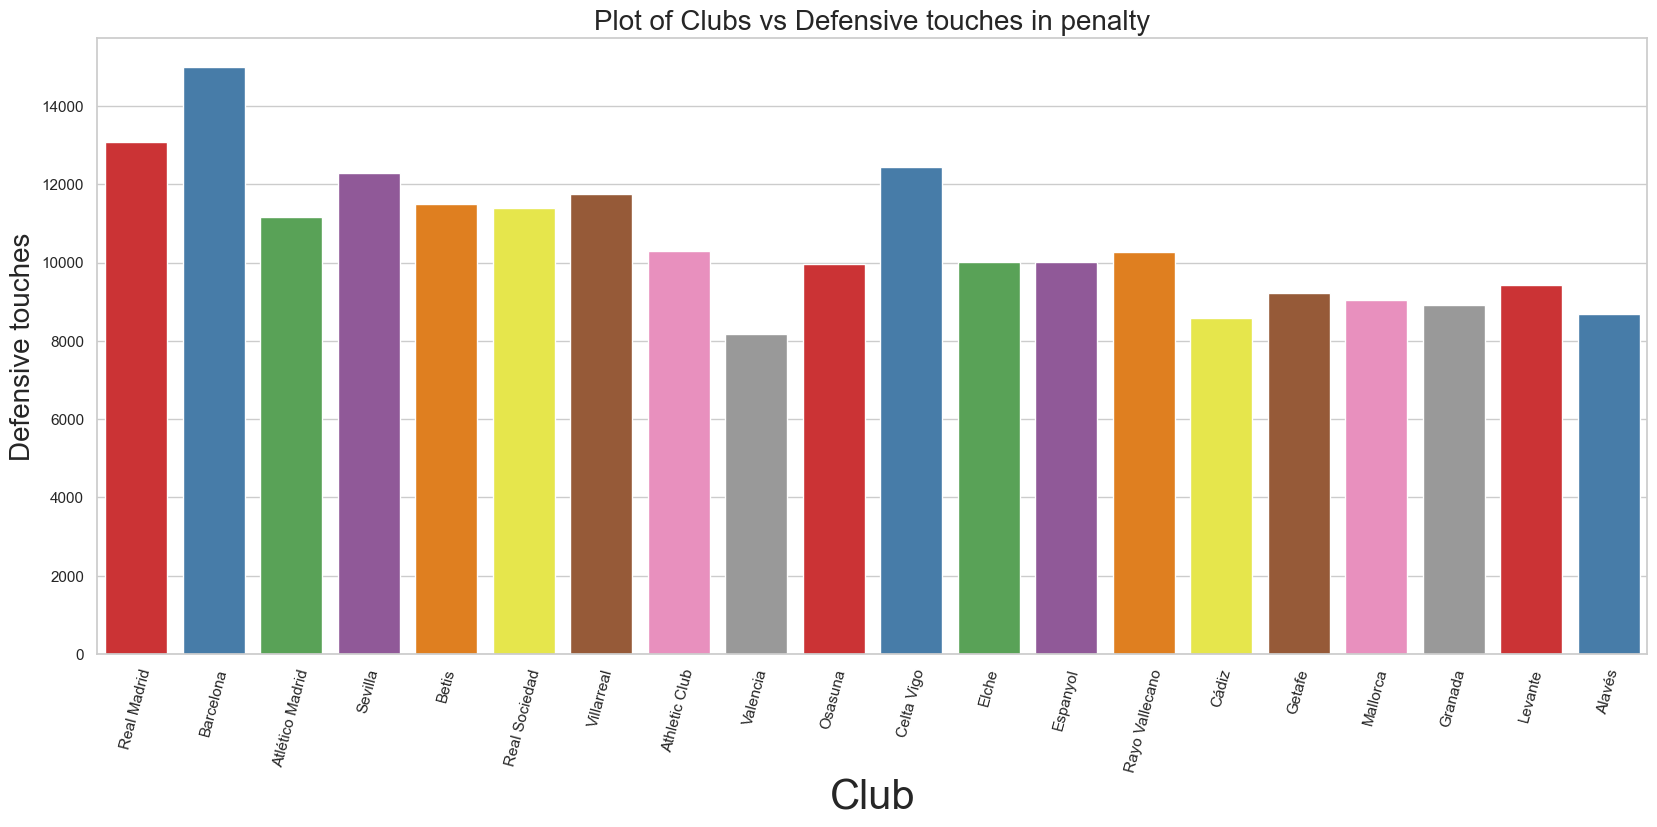

In [973]:
mid3rd_by_clubs1 = pd.DataFrame(laliga_df3.groupby('Squad', as_index = False, sort= False)['Mid 3rd'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Mid 3rd', data = mid3rd_by_clubs1, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

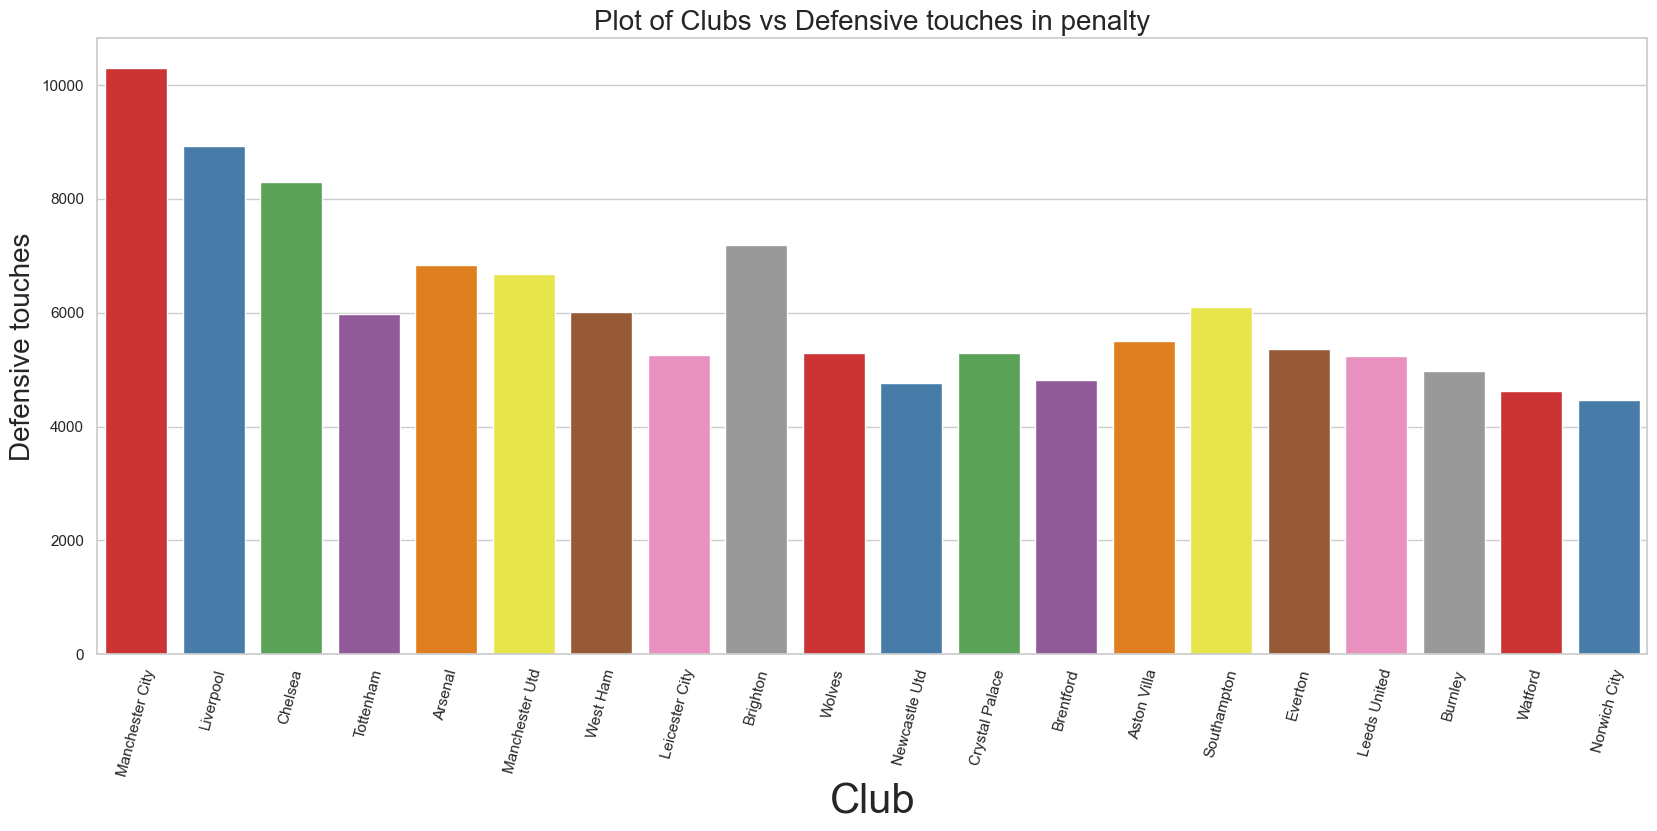

In [974]:
att3rd_by_clubs = pd.DataFrame(epl_df3.groupby('Squad', as_index = False, sort= False)['Att 3rd'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Att 3rd', data = att3rd_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

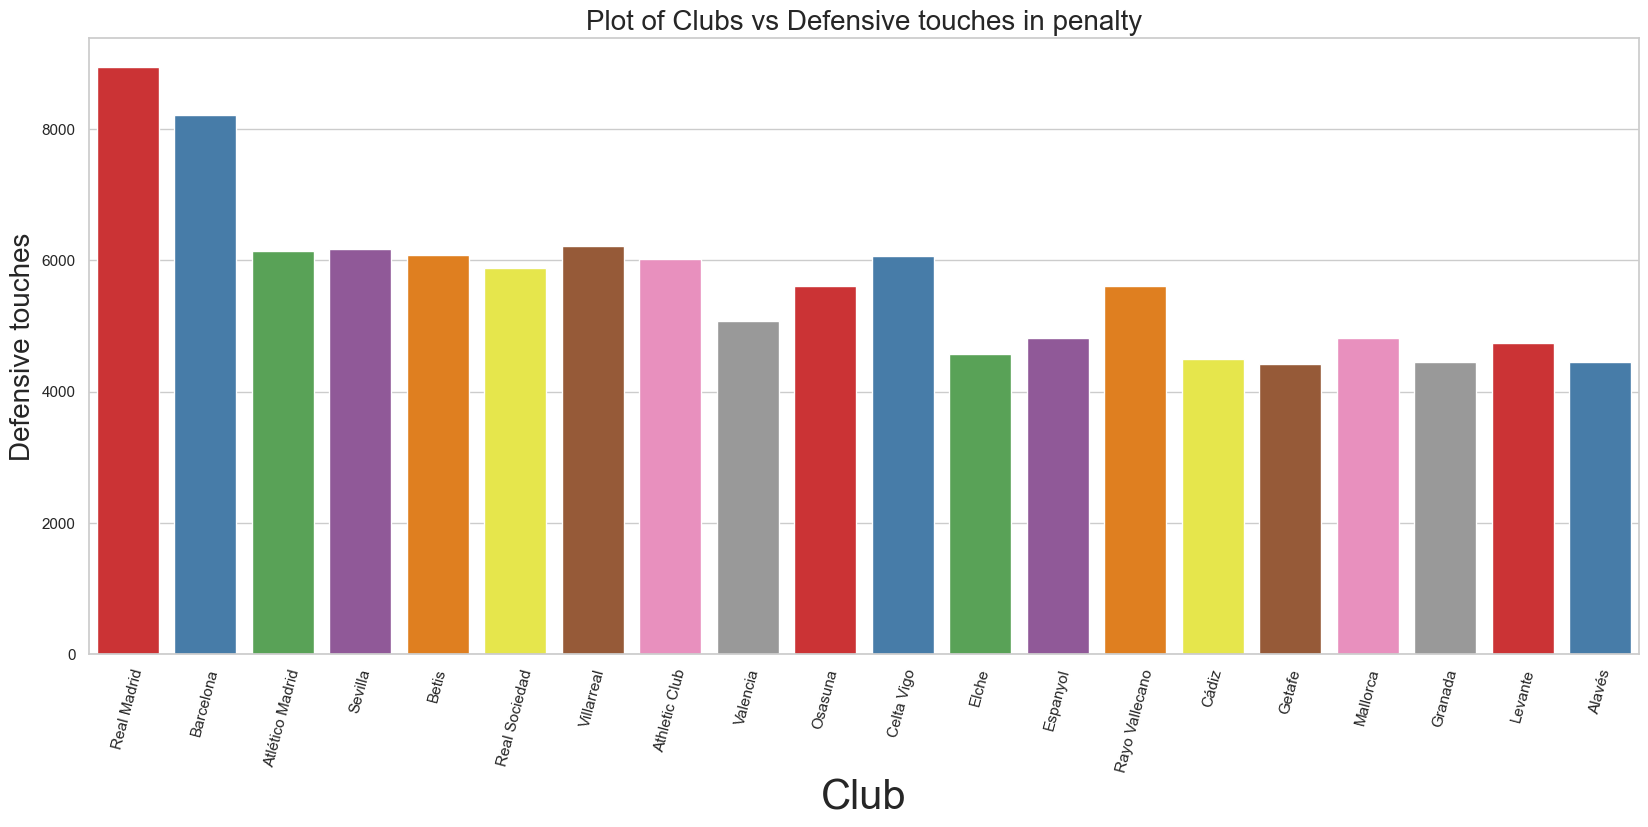

In [975]:
att3rd_by_clubs = pd.DataFrame(laliga_df3.groupby('Squad', as_index = False, sort= False)['Att 3rd'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Att 3rd', data = att3rd_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

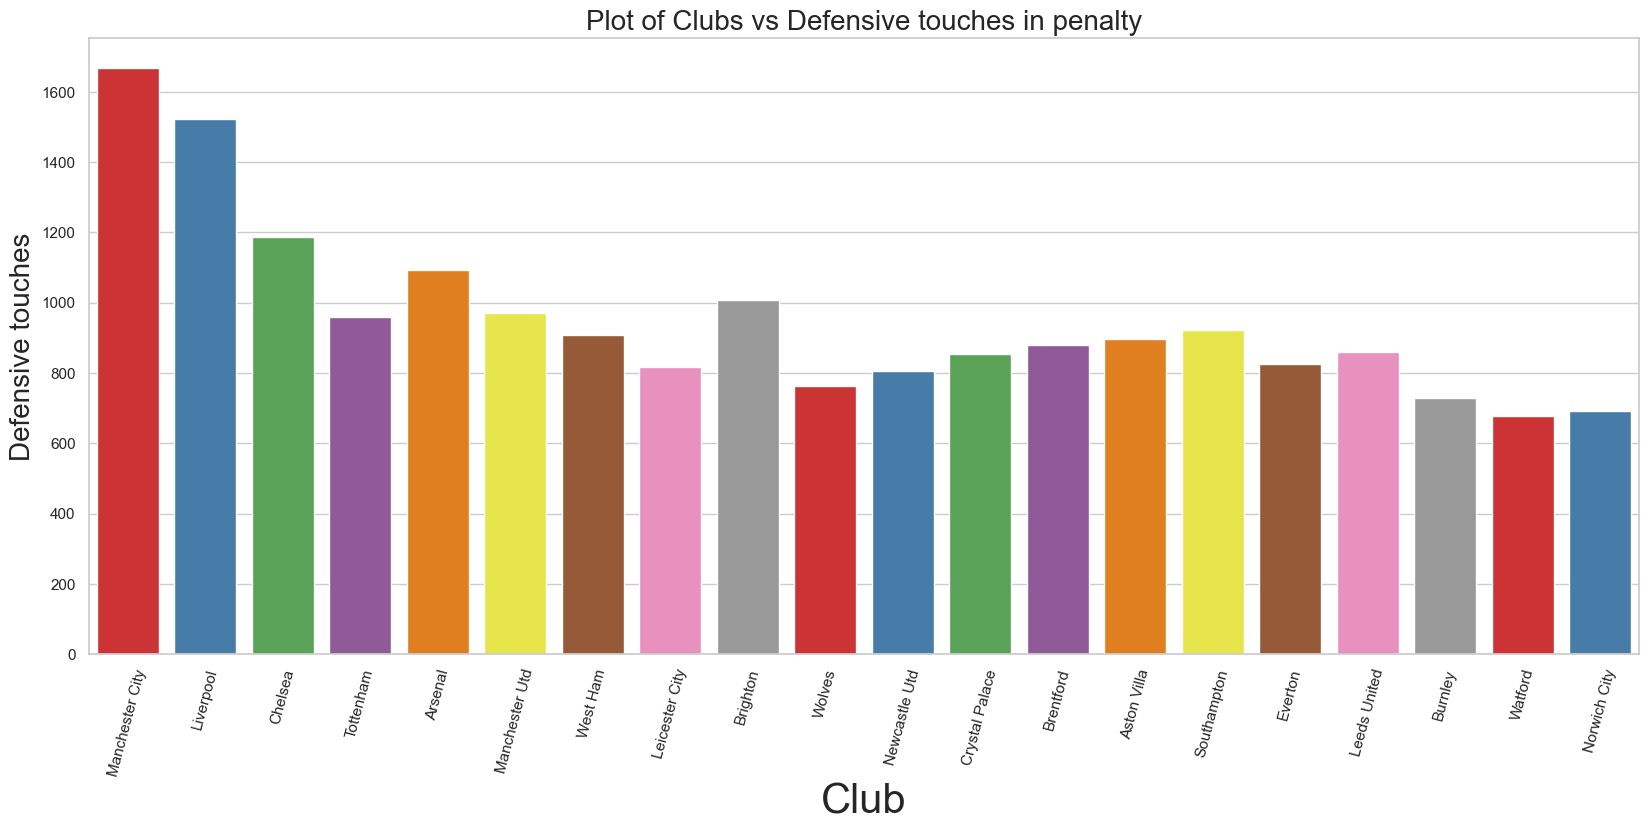

In [976]:
attpen_by_clubs = pd.DataFrame(epl_df3.groupby('Squad', as_index = False, sort= False)['Att Pen'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Att Pen', data = attpen_by_clubs, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

Text(0.5, 1.0, 'Plot of Clubs vs Defensive touches in penalty')

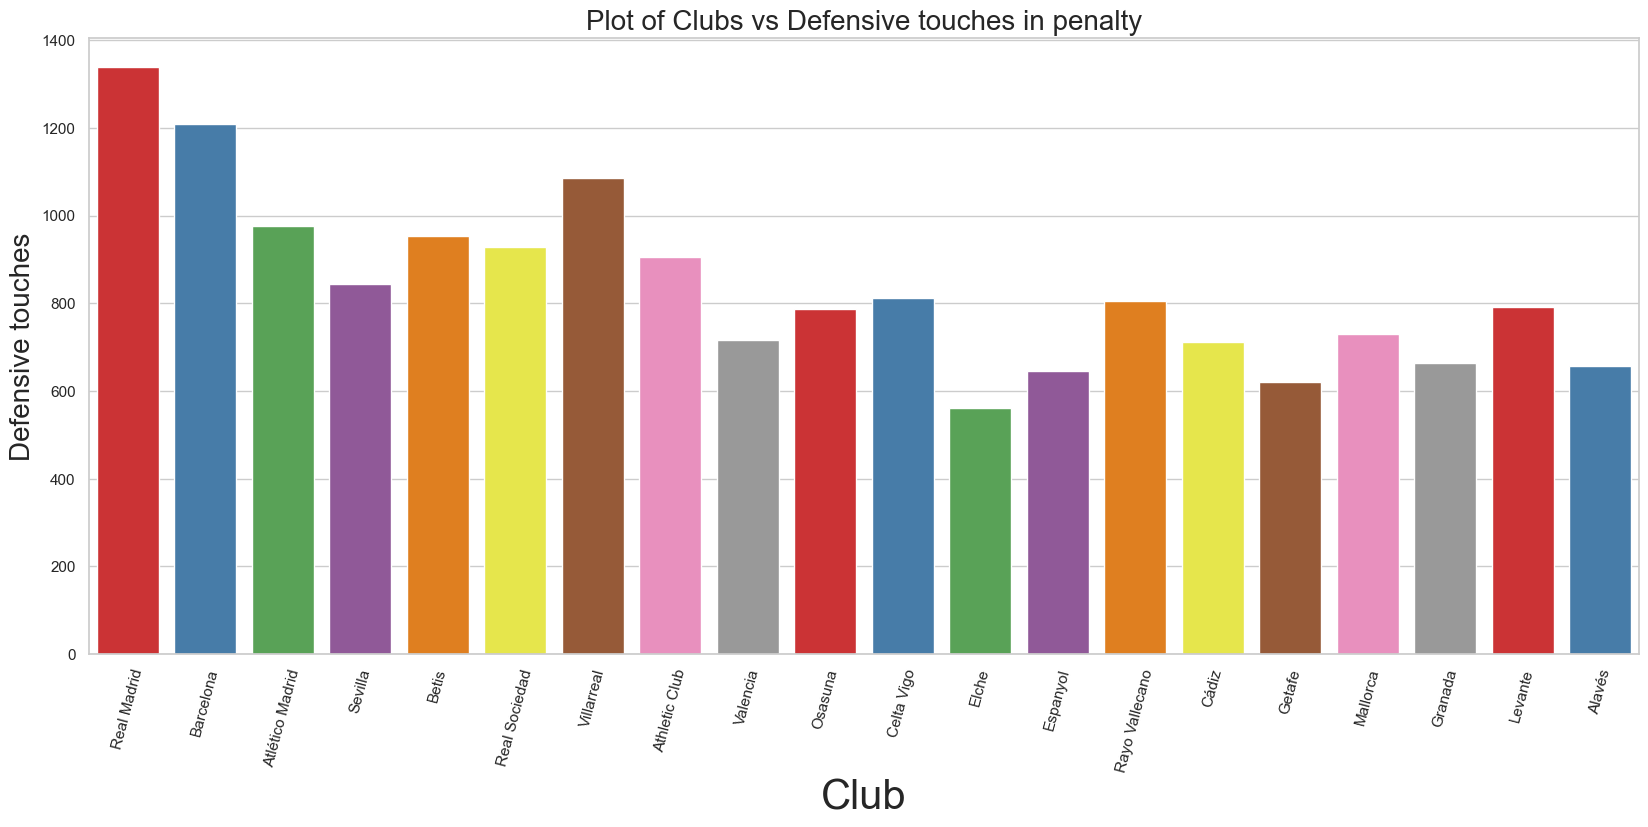

In [977]:
attpen_by_clubs1 = pd.DataFrame(laliga_df3.groupby('Squad', as_index = False, sort= False)['Att Pen'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Squad', y = 'Att Pen', data = attpen_by_clubs1, palette='Set1')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Defensive touches", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Defensive touches in penalty', fontsize = 20)

In [958]:
import plotly.express as px
fig = px.sunburst(epl_df, path=['Team', 'Position'], values='Goals')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [959]:
import plotly.express as px
fig = px.sunburst(laliga_df, path=['Squad', 'Pos'], values='Gls')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [960]:
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

df = filter_rows_by_values(df, "Team", ['Burnley,\xa0Newcastle United',
       'Leeds,\xa0Manchester United', 'Everton,\xa0Manchester United',
       'Arsenal,\xa0Aston Villa', 'Everton,\xa0Tottenham',
       'Aston Villa,\xa0Newcastle United', 'Aston Villa,\xa0Everton',
       'Brighton,\xa0Newcastle United'])

NameError: name 'df' is not defined

In [ ]:
df.Team.unique() 

In [ ]:
df_goal_scored = df[['Player','Team','G']]
df_goal_scored[:10]

In [ ]:
df_assist = df[['Player','Team','A']]
df_assist = df_assist.sort_values(by=['A'],ascending=False)
df_assist[:10]

In [ ]:
df_38 = df[['Player','Team','Apps']]
df_38 = df_38.sort_values(by=['Apps'],ascending=False)
df_38[df_38.Apps==38]

In [ ]:
df.info()

In [ ]:
df_xg = df[['Player','Team','xG90','Apps']]
df_xg = df_xg.sort_values(by=['xG90'],ascending=False)
df_xg = df_xg[(df_xg['Apps']>=30)]
df_xg[df_xg['xG90']>=0.3]

In [ ]:
df_xa = df[['Player','Team','xA90','Apps']]
df_xa = df_xa.sort_values(by=['xA90'],ascending=False)
df_xa = df_xa[(df_xa['Apps']>=30)]
df_xa[df_xa['xA90']>=0.2]

In [ ]:
df_zero = df[(df['G']==0) & (df['A']==0) & (df['Min']>=1000) & (df['xG90']!=0.00)]
# df_zero

In [ ]:
df['Player'] = df['Player'].apply(lambda x: x.split(' ')[1] if(len(x.split(' '))>1) else x)
#df['Player']

In [ ]:
teams = sorted(df['Team'].unique().tolist())
#teams

In [ ]:
first_color = '#EE0A1D' #color for representing the top goalscorer
second_color = '#2901E7' #color for representing the second top goalscorer
goal_color = '#FAF9FF' #color for the number of goals text inside the circle
line_color = '#000000'
y_ticks = [0, 5, 10, 15, 20, 25, 30]
fig, ax = plt.subplots(figsize=(18, 14))


spines = ['top', 'right', 'left', 'bottom']
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(teams, fontweight='bold', fontsize=15, rotation=90)
ax.set_yticklabels(y_ticks, fontweight='bold', fontsize=15)
plt.ylabel('Goals Scored', color=line_color, fontweight='bold', fontsize=20, fontfamily='serif')

for team in teams:
    team_df = df[(df['Team']==team)]
    #data manipulation to get the dataframe of a team's goalscorers sorted by the total number of goals
    topscorers = team_df[['Player','Team','G']][:2]
    #print(topscorers)
    
    ax.scatter(team, topscorers.iloc[0]['G'], c=first_color, s=600, zorder=3, ec=line_color)
    ax.scatter(team, topscorers.iloc[1]['G'], c=second_color, s=600, zorder=2, ec=line_color)
    ax.plot((team, team), (topscorers.iloc[0]['G'], topscorers.iloc[1]['G']), c=line_color, zorder=1, alpha=1, linewidth=3)
    ax.text(team, topscorers.iloc[0]['G'], topscorers.iloc[0]['G'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[0]['G']+0.7, topscorers.iloc[0]['Player'], c=first_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['G'], topscorers.iloc[1]['G'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['G']-0.7, topscorers.iloc[1]['Player'], c=second_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    
plt.ylim(0, 25)
ax.grid(which='both', alpha=0.2)
ax.text(-1, 28, "Each Team's Top Two Highest Goalscorers", c='#000000',ha='left', va='center', fontsize=25, fontfamily='serif', fontweight='bold')
ax.text(-1, 27, "EPL | 21/22 Season", c='#000000', ha='left', va='center', fontsize=20, fontfamily='serif', fontweight='bold')


#plt.savefig('dumbbell-chart-Goal.jpeg', dpi=700, bbox_inches='tight')

In [ ]:
df = df.sort_values(by='A',ascending=False)

In [ ]:
first_color = '#EE0A1D' #color for representing the top goalscorer
second_color = '#2901E7' #color for representing the second top goalscorer
goal_color = '#FAF9FF' #color for the number of goals text inside the circle
line_color = '#000000'
y_ticks = [0, 2,4,6,8,10,12,14]
fig, ax = plt.subplots(figsize=(18, 14))


spines = ['top', 'right', 'left', 'bottom']
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(teams, fontweight='bold', fontsize=15, rotation=90)
ax.set_yticklabels(y_ticks, fontweight='bold', fontsize=15)
plt.ylabel('Goals Scored', color=line_color, fontweight='bold', fontsize=20, fontfamily='serif')

for team in teams:
    team_df = df[(df['Team']==team)]
    #data manipulation to get the dataframe of a team's goalscorers sorted by the total number of goals
    topscorers = team_df[['Player','Team','A']][:2]
    #print(topscorers)
    
    ax.scatter(team, topscorers.iloc[0]['A'], c=first_color, s=600, zorder=3, ec=line_color)
    ax.scatter(team, topscorers.iloc[1]['A'], c=second_color, s=600, zorder=2, ec=line_color)
    ax.plot((team, team), (topscorers.iloc[0]['A'], topscorers.iloc[1]['A']), c=line_color, zorder=1, alpha=1, linewidth=3)
    ax.text(team, topscorers.iloc[0]['A'], topscorers.iloc[0]['A'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[0]['A']+0.5, topscorers.iloc[0]['Player'], c=first_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['A'], topscorers.iloc[1]['A'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['A']-0.5, topscorers.iloc[1]['Player'], c=second_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    
plt.ylim(0, 15)
ax.grid(which='both', alpha=0.2)
ax.text(-1, 16, "Each Team's Top Two Highest Assists", c='#000000',ha='left', va='center', fontsize=25, fontfamily='serif', fontweight='bold')
ax.text(-1, 15, "EPL | 21/22 Season", c='#000000', ha='left', va='center', fontsize=20, fontfamily='serif', fontweight='bold')


#plt.savefig('dumbbell-chart-Assist.jpeg', dpi=700, bbox_inches='tight')

In [ ]:
df['Goal+Assist'] = df['G']+df['A']
df = df.sort_values(by='Goal+Assist',ascending=False)
#df

In [ ]:
first_color = '#EE0A1D' #color for representing the top goalscorer
second_color = '#2901E7' #color for representing the second top goalscorer
goal_color = '#FAF9FF' #color for the number of goals text inside the circle
line_color = '#000000'
y_ticks = [0, 5, 10, 15, 20, 25, 30,35]
fig, ax = plt.subplots(figsize=(18, 14))


spines = ['top', 'right', 'left', 'bottom']
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(teams, fontweight='bold', fontsize=15, rotation=90)
ax.set_yticklabels(y_ticks, fontweight='bold', fontsize=15)
plt.ylabel('Goals Scored', color=line_color, fontweight='bold', fontsize=20, fontfamily='serif')

for team in teams:
    team_df = df[(df['Team']==team)]
    #data manipulation to get the dataframe of a team's goalscorers sorted by the total number of goals
    topscorers = team_df[['Player','Team','Goal+Assist']][:2]
    #print(topscorers)
    
    ax.scatter(team, topscorers.iloc[0]['Goal+Assist'], c=first_color, s=600, zorder=3, ec=line_color)
    ax.scatter(team, topscorers.iloc[1]['Goal+Assist'], c=second_color, s=600, zorder=2, ec=line_color)
    ax.plot((team, team), (topscorers.iloc[0]['Goal+Assist'], topscorers.iloc[1]['Goal+Assist']), c=line_color, zorder=1, alpha=1, linewidth=3)
    ax.text(team, topscorers.iloc[0]['Goal+Assist'], topscorers.iloc[0]['Goal+Assist'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[0]['Goal+Assist']+0.9, topscorers.iloc[0]['Player'], c=first_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['Goal+Assist'], topscorers.iloc[1]['Goal+Assist'], c=goal_color, va='center', ha='center', fontsize=15, fontfamily='serif')
    ax.text(team, topscorers.iloc[1]['Goal+Assist']-0.9, topscorers.iloc[1]['Player'], c=second_color, va='center', ha='center', fontsize=10, fontfamily='serif')
    
plt.ylim(0, 38)
ax.grid(which='both', alpha=0.2)
ax.text(-1, 40, "Each Team's Top Two Highest Goal Scorer+Assists", c='#000000',ha='left', va='center', fontsize=25, fontfamily='serif', fontweight='bold')
ax.text(-1, 38, "EPL | 21/22 Season", c='#000000', ha='left', va='center', fontsize=20, fontfamily='serif', fontweight='bold')


#plt.savefig('dumbbell-chart-Assist-Goal.jpeg', dpi=700, bbox_inches='tight')

In [ ]:
epl_df.info()

In [ ]:
epl_df1.info()

In [ ]:
epl_df2.info()

In [ ]:
epl_df.describe()

In [ ]:
epl_df1.describe()

In [ ]:
epl_df2.describe()

In [ ]:
epl_df.isna().sum()

In [ ]:
epl_df1.isna().sum()

In [ ]:
epl_df2.isna().sum()

In [ ]:
epl_df['YellowCardsPerAppearance'] = (epl_df['YellowCards'] / epl_df['Apearances']).astype(float)
epl_df['RedCardsPerAppearance'] = (epl_df['RedCards'] / epl_df['Apearances']).astype(float)
epl_df['GoalsPerAppearance'] = (epl_df['Goals'] / epl_df['Apearances']).astype(float)
# print(epl_df.head())

In [ ]:
stats_mancity = epl_df[epl_df['Team'] == 'Manchester City']

In [ ]:
mancity_players = stats_mancity[stats_mancity['Position'].isin(['Goalkeeper', 'Defender','Midfielder','Midfielder/Forward',
                                                       'Defender/Midfielder', 
                                                       'Defender/Midfielder/Forward','Forward'])]
defensive = stats_mancity[stats_mancity['Position'].isin(['Goalkeeper', 'Defender'])]
midfield = stats_mancity[stats_mancity['Position'].isin(['Midfielder','Midfielder/Forward',
                                                       'Defender/Midfielder', 
                                                       'Defender/Midfielder/Forward'])]
offensive = stats_mancity[stats_mancity['Position'].isin(['Forward'])]



In [ ]:
# mancity_players.sort_values(by='Apearances', ascending=False)

In [ ]:
defensive.sort_values(by='Apearances', ascending=False)

In [ ]:
midfield.sort_values(by='Apearances', ascending=False).iloc[:10, :]

In [ ]:
Total_Goals = epl_df['Goals'].sum()
print(Total_Goals)

In [ ]:
Total_Penalties = epl_df['Penalties'].sum()
print(Total_Penalties)

In [ ]:
# plt.figure(figsize=(13, 6))
# pl_scored = epl_df['Goals'].sum()
# pl_appearance = epl_df['Penalties'].sum()
# data = [pl_scored, pl_appearance]
# labels = ['Total Goals', 'Total Penalties']
# color = sns.color_palette('Set2')
# plt.pie(data, labels = labels, colors = color, autopct = '%.0f%%')
# plt.show()


In [ ]:
plt.figure(figsize=(30, 20))
plt.subplot(2,3,1)
sns.barplot(x='Position',y='Goals',data=epl_df).set_title('Goals')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='Position',y='RedCards',data=epl_df).set_title('RedCards')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(x='Position',y='YellowCards',data=epl_df).set_title('YellowCards')
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.barplot(x='Position',y='Apearances',data=epl_df).set_title('Apearances')
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.barplot(x='Position',y='Substitutions',data=epl_df).set_title('Substitutions')
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.barplot(x='Position',y='Penalties',data=epl_df).set_title('Penalties')
plt.xticks(rotation=90)

plt.show()

In [ ]:
plt.subplots(figsize=(20, 12))
sns.scatterplot(x="Position", y="Goals",hue='YellowCards',s=200,palette="pastel",
                data=epl_df).set_title("Goals vs Apearance")
plt.xticks(rotation=90)

In [ ]:
fig = px.sunburst(epl_df, path=['Position', 'Team'], values='Goals',color='Position')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [ ]:

fig = px.sunburst(epl_df, path=['Team', 'Position'], values='Goals')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [ ]:
epl_df['Position'].unique()

In [ ]:
epl_df[epl_df['Position'] == 'Forward']

In [ ]:
np.size((epl_df['Team'].unique()))

In [ ]:
# teams = epl_df.groupby('Team').size().sort_values(ascending = False)
# teams.head(20).plot(kind = 'bar', figsize=(20, 6), color =sns.color_palette("magma"))

In [ ]:
#epl_df['Team'].value_counts().nlargest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

In [ ]:
#epl_df['Team'].value_counts().nsmallest(5).plot(kind = 'bar', color = sns.color_palette("viridis"))

In [ ]:
appearance_under10 = epl_df[epl_df['Apearances'] <= 10]
appearance11_20 = epl_df[(epl_df['Apearances'] > 10) & (epl_df['Apearances'] <= 20)]
appearance21_30 = epl_df[(epl_df['Apearances'] > 20) & (epl_df['Apearances'] <= 30)]
appearance_above30 = epl_df[epl_df['Apearances'] > 30]


In [ ]:
# x = np.array([appearance_under10['Player'].count(), appearance11_20['Player'].count(), appearance21_30['Player'].count(), appearance_above30['Player'].count()])
# mylabels = ["<=10", ">10 & <=20", ">20 & <=30", ">30"]
# plt.title('Total Players with Appearance', fontsize = 20)
# plt.pie(x, labels = mylabels, autopct="%.1f%%")
# plt.show()

In [ ]:
players_above_20 = epl_df[epl_df['Apearances'] > 20]
# players_under_20['Team'].value_counts().plot(kind = 'bar', color = sns.color_palette("cubehelix")) 

In [ ]:
players_above_20[players_above_20["Team"] =='Manchester City']

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Team', y = 'Apearances', data = epl_df)
plt.xticks(rotation = 90)

In [ ]:
num_player = epl_df.groupby('Team').size()
data = (epl_df.groupby('Team')['Apearances'].sum()) / num_player
data.sort_values(ascending = False)

In [ ]:
goals_by_clubs = pd.DataFrame(epl_df.groupby('Team', as_index = False)['Goals'].sum())
sns.set_theme(style = "whitegrid", color_codes = True) 
ax = sns.barplot(x='Team', y = 'Goals', data = goals_by_clubs.sort_values(by = "Goals"), palette='Set2')
ax.set_xlabel("Club", fontsize = 30)
ax.set_ylabel("Goals", fontsize = 20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total goals', fontsize = 20)

In [ ]:
# top_10_goals = epl_df [['Player', 'Team', 'Goals', 'Apearances']].nlargest(n=10, columns = 'Goals')
# top_10_goals

In [ ]:
top_10_goals_per_appearance = epl_df[['Player', 'GoalsPerAppearance', 'Apearances', 'Goals']].nlargest(n=10, columns = 'GoalsPerAppearance')
top_10_goals_per_appearance

In [ ]:
epl_yellow = epl_df.sort_values(by='YellowCards', ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title("Players with the most yellow cards")
c = sns.barplot(x=epl_yellow['Player'], y = epl_yellow['YellowCards'], label = 'Player', color = 'yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(), rotation = 45)
c

In [ ]:
epl_red = epl_df.sort_values(by='RedCards', ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title("Players with the most red cards")
d = sns.barplot(x=epl_red['Player'], y = epl_red['RedCards'], label = 'Player', color = 'red')
plt.ylabel('Number of Red Cards')
d.set_xticklabels(c.get_xticklabels(), rotation = 45)


In [ ]:
num_player1 = epl_df.groupby('Position').size()
data = (epl_df.groupby('Position')['Goals'].sum()) 
data.sort_values(ascending = False)

In [ ]:
num_player1 = epl_df.groupby('Position').size()
data = (epl_df.groupby('Position')['Goals'].sum()) / num_player1  
data.sort_values(ascending = False)

In [ ]:
table = pd.read_csv('E:\\storage\\Download\\points_table.csv')

In [ ]:
cl = ['Manchester City', 'Liverpool', 'Chelsea','Tottenham Hotspur']
el = ['Arsenal']
relegate = ['Burnley','Watford','Norwich City']
cl_style = 'color:white; background-color:darkgreen;text-shadow: 3px 3px 3px black;'
tott_style = 'color:white;background-color:darkorange;text-shadow: 3px 3px 3px black;'
el_style = 'color:white;background-color:darkblue;text-shadow: 3px 3px 3px black;'
rel_style = 'color:white;background-color:darkred;text-shadow: 3px 3px 3px black;'
t1 = table.style.\
applymap(lambda v:  cl_style if v in cl  else None)\
.applymap(lambda v: tott_style  if v in ['Manchester United', 'West Ham United']  else None)\
.applymap(lambda v: el_style  if v in el  else None)\
.applymap(lambda v: rel_style  if v in relegate  else None)
t1.set_caption('⚽ EPL Table Season 2021-2022 ⚽')

In [ ]:
table.plot(x='Team', y='Pts', kind='bar',figsize=(15,5), edgecolor='black', linewidth=1.8);
for i, u in enumerate(table.Pts.tolist()):
        plt.annotate(str(u), xy=(i-0.1, u), xytext=(i-0.125, 2), bbox = dict(boxstyle="round", fc="0.8",
                                                                   color='black'))
plt.hlines(table.Pts.mean(), -1, 20, label='Avg Pts', color='red', linestyles='dashdot');
plt.legend();
plt.title('EPL ranking points');

In [ ]:
# table.drop(columns=['Pos','Pld']).plot(layout=(2, 4), subplots=True, kind='box');
# plt.suptitle('EPL fixture', y=1.05);

In [ ]:
t2 =table.sort_values('GF', ascending=False)
vcols = t2.Team.tolist()[:5]

In [ ]:
t2.head(5)[['Team','GF']].style.applymap(lambda v: tott_style if v in vcols  else None)\
.set_caption('⚽ Five Best attack ⚽').bar(align='mid')

In [ ]:
t3 =table.sort_values('GA', ascending=True)
vc = t3.Team.tolist()[:5]

In [ ]:
t3.head(5)[['Team','GA']].style.applymap(lambda v: tott_style if v in vc  else None)\
.set_caption('⚽ Five Best defense ⚽').bar(align='mid')

In [ ]:
table.drop(columns=['Pos','Pld']).corr()

In [ ]:

sns.regplot(x='GD', y='Pts', data=table, robust=True);
plt.title('GD-Pts regression');
plt.annotate('Manutd', xy=(0, 57), xytext=(-2, 59), bbox = dict(boxstyle="round", fc="0.8", color='red'));
plt.annotate('Mancity', xy=(75, 93), xytext=(75, 90), 
             bbox = dict(boxstyle="round", fc="0.8", color='orange'));
plt.annotate('Liverpool', xy=(55, 92), xytext=(55, 92), 
             bbox = dict(boxstyle="round", fc="0.8", color='orange'));

In [ ]:
epl_df1['Date'] = pd.to_datetime(epl_df1['Date'])

In [ ]:
mancity_home = epl_df1[epl_df1.HomeTeam == 'Manchester City']
mancity_away = epl_df1[epl_df1.AwayTeam == 'Manchester City']

In [ ]:
first_leg = mancity_home[mancity_home.Date < '2022-01-05'].append(mancity_away[mancity_away.Date < '2022-01-05']) 
second_leg = mancity_home[mancity_home.Date > '2022-01-05'].append(mancity_away[mancity_away.Date > '2022-01-05']) 

In [ ]:
first_leg.sort_values('Date', inplace=True)
first_leg.set_index('Date', inplace=True)

In [ ]:
def wdl_home(data):
    
    decision = []
    gf = []
    ga = []
    home = data[data.HomeTeam == 'Manchester City']
    
    for u, v in [row.split(':') for row in home.Result.tolist()]:
        
        u = int(u)
        v = int(v)
        if u > v:
            decision.append('W')
            gf.append(u)
            ga.append(v)
        elif u < v:
            decision.append('L')
            gf.append(u)
            ga.append(v)
        else:
            decision.append('D')
            gf.append(u)
            ga.append(v)
    home['WDL'] = decision
    home['Scored'] = gf
    home['Conceded'] = ga
    home['GD'] = home['Scored'] - home['Conceded']
    return home

def wdl_away(data):
    
    decision = []
    gf = []
    ga = []
    
    away = data[data.AwayTeam == 'Manchester City']
    
    for u, v in [row.split(':') for row in away.Result.tolist()]:
        
        u = int(u)
        v = int(v)
        if u > v:
            decision.append('L')
            gf.append(v)
            ga.append(u)
        elif u < v:
            decision.append('W')
            gf.append(v)
            ga.append(u)
        else:
            decision.append('D')
            gf.append(v)
            ga.append(u)
            
    away['WDL'] = decision
    away['Scored'] = gf
    away['Conceded'] = ga
    away['GD'] = away['Scored'] - away['Conceded']
    return away

In [ ]:
home_1stleg = wdl_home(first_leg)
away_1stleg = wdl_away(first_leg)

In [ ]:
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
home_1stleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Mancity at home',
                                        color='red', ax=ax1);
ax1.set_ylabel('counts')
ax1.set_title('WDL home')
ax1.legend();
away_1stleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Mancity at away',
                                        color='blue', ax=ax2);
ax2.set_title('WDL away')
ax2.set_ylabel('counts')
ax2.legend();

In [ ]:
home_1stleg.GD.plot(color='red',label='Home GD');
away_1stleg.GD.plot(label='Away GD');
plt.legend();
plt.ylabel('Goal difference');
plt.title('Manchester City Goal difference first leg');

In [ ]:
home_1stleg.iloc[[0,4], :]

In [ ]:
away_1stleg.iloc[[3,4,5], :]

In [ ]:
home_2ndleg.iloc[[4,6,8], :]

In [ ]:
home_1stleg.mean()

In [ ]:
away_1stleg.mean()

In [ ]:
home_2ndleg = wdl_home(second_leg)
away_2ndleg = wdl_away(second_leg)

In [ ]:
fig1 = plt.figure(figsize=(15, 5))
fig1.subplots_adjust(wspace=0.3)
axis1 = fig1.add_subplot(1,2,1)
axis2 = fig1.add_subplot(1,2,2)
home_2ndleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Mancity at home',
                                        color='red', ax=axis1);
axis1.set_ylabel('counts')
axis1.set_title('WDL home')
axis1.legend();
away_2ndleg.WDL.value_counts().plot.bar(edgecolor='black', linewidth=1.2, label='Mancity at away',
                                        color='blue', ax=axis2);
axis2.set_title('WDL away')
axis2.set_ylabel('counts')
axis2.legend();

In [ ]:
home_2ndleg.GD.plot(color='red',label='Home GD');
away_2ndleg.GD.plot(label='Away GD');
plt.legend()
plt.ylabel('Goal difference');
plt.title('Manchester City Goal difference second leg');

In [ ]:
home_2ndleg.mean()

In [ ]:
away_2ndleg.mean()

In [ ]:
stats_mancity = epl_df[epl_df['Team'] == 'Manchester City']

In [ ]:
defensive = stats_mancity[stats_mancity['Position'].isin(['Goalkeeper', 'Defender'])]
midfield = stats_mancity[stats_mancity['Position'].isin(['Midfielder','Midfielder/Forward',
                                                       'Defender/Midfielder', 
                                                       'Defender/Midfielder/Forward'])]
offensive = stats_mancity[stats_mancity['Position'].isin(['Forward'])]

In [ ]:
defensive.sort_values(by='Apearances', ascending=False)

In [ ]:
midfield.sort_values(by='Apearances', ascending=False).iloc[:10, :]

In [ ]:
offensive.sort_values(by='Apearances', ascending=False).iloc[:10, :]

In [ ]:
stats_manutd = epl_df[epl_df['Team'] == 'Manchester United']

In [ ]:
defensive1 = stats_manutd[stats_manutd['Position'].isin(['Goalkeeper', 'Defender'])]
midfield1 = stats_manutd[stats_manutd['Position'].isin(['Midfielder','Midfielder/Forward',
                                                       'Defender/Midfielder', 
                                                       'Defender/Midfielder/Forward'])]
offensive1 = stats_manutd[stats_manutd['Position'].isin(['Forward'])]

In [ ]:
defensive1.sort_values(by='Apearances', ascending=False).iloc[:5, :]

In [ ]:
midfield1.sort_values(by='Apearances', ascending=False).iloc[:5, :]

In [ ]:
offensive1.sort_values(by='Apearances', ascending=False).iloc[:10, :]

In [ ]:
players_goals =  stats_manutd[stats_manutd.Goals > 1]

In [ ]:
import urllib.request
img_url = urllib.request.urlopen('https://www.jeunesfooteux.com/photo/art/grande/63541028-45782180.jpg?v=1649077843')

In [ ]:
img = Image.open(img_url)

In [ ]:
# players and goals list
# The goals is for all competition
players = players_goals.Player.tolist()
goals = players_goals.Goals+players_goals.Penalties

# minimum range value and maximum range value (1 appearance = 1 goal) 
min_range = [1 for _ in range(len(players))]
max_range = players_goals.Apearances.tolist()

# instantiate PyPizza class
baker = PyPizza(
    params=players,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, straight_line_lw=1,
    other_circle_lw=0, other_circle_color="#000000", inner_circle_size=20,
)

# plot pizza
fig, ax = baker.make_pizza(
    goals.tolist(),                     # list of values
    figsize=(10, 12),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                           # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Goals player performance - Manchester United F.C", size=18,
    ha="center", color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "English Premier League | Season 2021-22 | EPL ranking: 6th",
    size=15,ha="center", color="#F2F2F2")

# add credits
CREDIT_1 = "data: EPL 2021-22 English Premier League - Kaggle"
CREDIT_2 = "done by: @Massock Batalong Maurice Blaise"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,color="#F2F2F2",
    ha="right"
)

# add image
ax_image = add_image(
    img, fig, left=0.439, bottom=0.4025, width=0.13, height=0.197
)   # these values might differ when you are plotting

plt.show()

In [ ]:
players_selected_home = [1,5,19,2,6,29,18,17,25,7,11]
players_selected_away = [1,23,5,19,20,39,29,18,17,25,7]

In [ ]:
def pitch_plotting(js_home=None, js_away=None):
    """
        @params js_home: is a jersey number of player at home
        @params js_away: is a jersey number of player at away
        
        return graphs
    """
    #to 
    formation352 = {'Position': ['GK','DC','DC','DC','MD','MD','MO','LWB','RWB','ST','SA'],
                'X': [5, 20, 20, 20, 40, 40, 70, 85, 85, 105, 105],
                'Y': [40, 20, 40, 60, 30, 50, 40, 10, 70, 30, 50]}
    formation451 = {'Position': ['GK','LB','DC','DC','RB','MD','MD','LM','RM','MO','ST'],
                'X': [5, 20, 20, 20, 20, 40, 40, 70, 70, 70, 95],
                'Y': [40, 10, 30, 50, 70, 30, 50, 40, 10, 70, 40]}
    
    #plotting
    pitch = VerticalPitch(pitch_color='grass', line_color='white', stripe=True)
    figure, axs = pitch.grid(figheight=8, endnote_height=0, title_height=0.1,
                             title_space=0.02, 
                             axis=False, space=0.5,
                             grid_height=0.83, nrows=1, ncols=2)

    sc1 = pitch.scatter(formation352['X'] , formation352['Y'], s=600, c='red', 
                        label='3-5-2 (Home)', ax=axs['pitch'][0] )
    # plot the jersey numbers
    for i, label in enumerate(js_home):
        pitch.annotate(label, (formation352['X'][i] , formation352['Y'][i]),
                       va='center', ha='center', color='white',fontsize=15, ax=axs['pitch'][0],
                      bbox = dict(boxstyle="circle,pad=0.5", fc='red', color='black'))
    axs['pitch'][0].legend(loc='best', labelspacing=1.5)

    
    sc2 = pitch.scatter(formation451['X'] , formation451['Y'],
                        s=500, c='blue', label='4-5-1 (Away)', ax=axs['pitch'][1])
    # plot the jersey numbers
    for i, label in enumerate(js_away):
        pitch.annotate(label, (formation451['X'][i] , formation451['Y'][i]),
                       va='center', ha='center', color='white',fontsize=15, ax=axs['pitch'][1],
                      bbox = dict(boxstyle="circle,pad=0.5", fc='blue', color='black'))
    axs['pitch'][1].legend(loc='best', labelspacing=1.5);
    # title
    axs['title'].text(0.5, 0.5, 'Manchester United F.C formation',va='center', ha='center',
                      color='black',fontsize=18);

In [ ]:
pitch_plotting(js_home=players_selected_home, js_away=players_selected_away)

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')